In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point
from pyproj import Proj, Transformer

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 7772.63it/s]


In [5]:
edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
957  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
958  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
959  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
960  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
961  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        0      1  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (2, 3)   
2      None    2        4      5  121.794737  0.004872      121      (4, 5)   
3      None    3        6      7   28.046592  0.001122       28      (6, 7)   
4      None    4        8    492  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
957    None  957      803    463   73.656989  0.002946       73  (803, 463)   
958    None  958      462    803    9.568427  0.000383        9  (462, 803)   
959    None  959      804    246    9.568874  0.000383        9  (804, 246)   
960    None  960      463    804   73.789113  0.002952       73  (463, 804)   
961    None  961      249    256   40.444210  0.001618       40  (249, 256)   

        from_to  
0        (1, 0)  
1        (3, 2)  
2        (5, 4)  
3        (7, 6)  
4      (492, 8)  
..          ...  
957  (463, 803)  
958  (803, 462)  
959  (246, 804)  
960  (804, 463)  
961  (256, 249)  

[962 rows x 12 columns]

In [6]:
nodes

geometry  degree   id
0    POINT (4.9236699 52.3361909)       2    0
1    POINT (4.9232197 52.3339159)       2    1
2    POINT (4.9642294 52.2945339)       2    2
3    POINT (4.9673168 52.2943931)       2    3
4    POINT (4.9622901 52.2955678)       2    4
..                            ...     ...  ...
863  POINT (4.8906476 52.3539585)       2  863
864  POINT (4.8906487 52.3539577)       2  864
865  POINT (4.8927726 52.3704434)       2  865
866   POINT (4.9010846 52.371353)       2  866
867  POINT (4.9009379 52.3714238)       2  867

[868 rows x 3 columns]

In [7]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

osm_id   route                to  \
0    18683  subway       Isolatorweg   
1  4515354  subway              Gein   
2    31249  subway       Isolatorweg   
3  4515355  subway  Centraal Station   
4  8466667  subway              Zuid   
5  8466671  subway             Noord   
6    18532  subway       Gaasperplas   
7  4515356  subway  Centraal Station   
8    18423  subway              Gein   
9  4515357  subway  Centraal Station   

                                        name ref                 network  \
0              Metro 50: Gein => Isolatorweg  50  Stadsvervoer Amsterdam   
1              Metro 50: Isolatorweg => Gein  50  Stadsvervoer Amsterdam   
2  Metro 51: Centraal Station => Isolatorweg  51  Stadsvervoer Amsterdam   
3  Metro 51: Isolatorweg => Centraal Station  51  Stadsvervoer Amsterdam   
4                    Metro 52: Noord => Zuid  52  Stadsvervoer Amsterdam   
5                    Metro 52: Zuid => Noord  52  Stadsvervoer Amsterdam   
6  Metro 53: Centraal Station => Gaasperplas  53  Stadsvervoer Amsterdam   
7  Metro 53: Gaasperplas => Centraal Station  53  Stadsvervoer Amsterdam   
8         Metro 54: Centraal Station => Gein  54  Stadsvervoer Amsterdam   
9         Metro 54: Gein => Centraal Station  54  Stadsvervoer Amsterdam   

  service                                           geometry  
0    None  MULTILINESTRING ((4.98996 52.29640, 4.98959 52...  
1    None  MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
2    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
3    None  MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
4    None  MULTILINESTRING ((4.93265 52.40228, 4.93269 52...  
5    None  MULTILINESTRING ((4.87423 52.33922, 4.87552 52...  
6    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
7    None  MULTILINESTRING ((4.98373 52.31201, 4.98364 52...  
8    None  MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
9    None  MULTILINESTRING ((4.98996 52.29640, 4.98959 52...

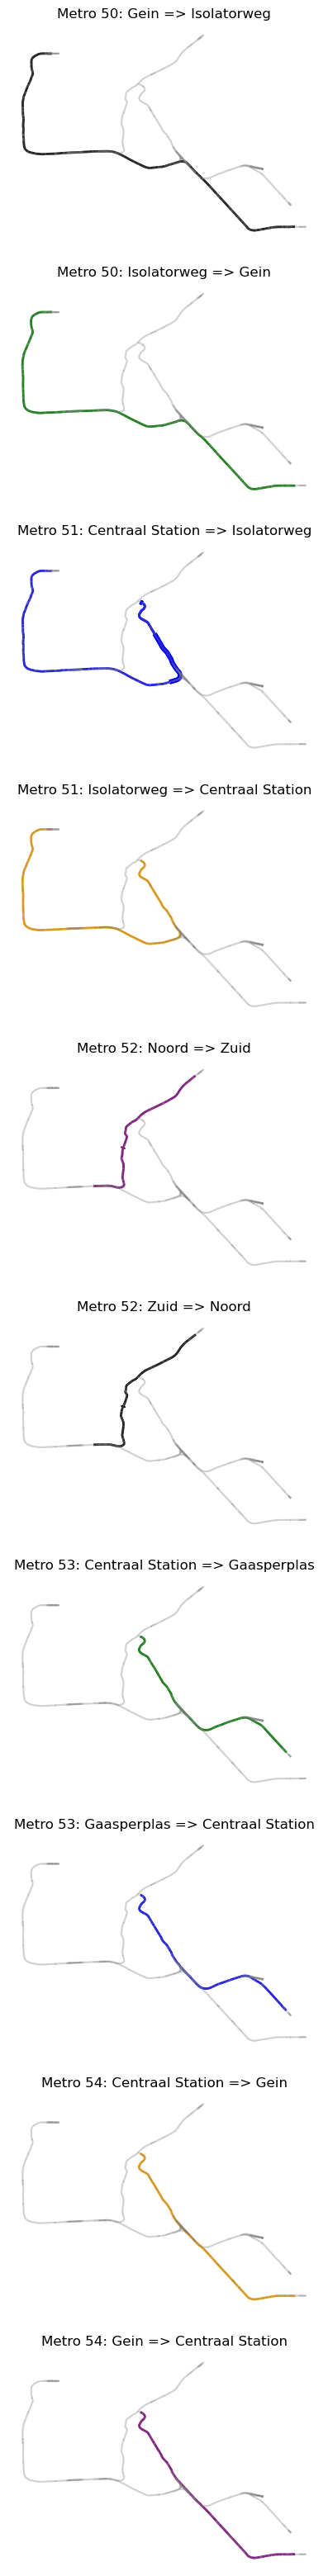

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [10]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x      geo_y
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161  52.296407
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974  52.295637
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126  52.298132
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129  52.306869
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618  52.311806
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398  52.318612
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656  52.323602
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454  52.329785
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606  52.331769
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539  52.337689
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963  52.339322
 11   8

In [11]:
sub_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
957  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
958  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
959  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
960  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
961  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        0      1  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (2, 3)   
2      None    2        4      5  121.794737  0.004872      121      (4, 5)   
3      None    3        6      7   28.046592  0.001122       28      (6, 7)   
4      None    4        8    492  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
957    None  957      803    463   73.656989  0.002946       73  (803, 463)   
958    None  958      462    803    9.568427  0.000383        9  (462, 803)   
959    None  959      804    246    9.568874  0.000383        9  (804, 246)   
960    None  960      463    804   73.789113  0.002952       73  (463, 804)   
961    None  961      249    256   40.444210  0.001618       40  (249, 256)   

        from_to  
0        (1, 0)  
1        (3, 2)  
2        (5, 4)  
3        (7, 6)  
4      (492, 8)  
..          ...  
957  (463, 803)  
958  (803, 462)  
959  (246, 804)  
960  (804, 463)  
961  (256, 249)  

[962 rows x 12 columns]

In [12]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0    166187911  LINESTRING (4.9823107 52.2963387, 4.9838859 52...  subway   
 1    166187914  LINESTRING (4.9850607 52.2963027, 4.9855227 52...  subway   
 2    166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 3    166187918  LINESTRING (4.9776921 52.2962066, 4.9783293 52...  subway   
 4    166187922  LINESTRING (4.9847395 52.2963009, 4.9850607 52...  subway   
 ..         ...                                                ...     ...   
 165  166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 166  166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 167  166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 168  166370275  LINESTRING (4.8467329 52.3951774, 4.8471465 52...  subway   
 169  166370277  LINESTRING (4.8389786 52.3890375, 4.8389667 52...  subway   
 
     service   id  from_id  t

## Add columns to nodes

In [13]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [14]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161   
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974   
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126   
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129   
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618   
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398   
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656   
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454   
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 11   8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 12  11    Henk Sneevlietweg  P

In [15]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, nodes)

In [16]:
sub_new_nodes

geometry  degree   id                 name     geo_x  \
0   POINT (4.98916 52.29641)       2  328                 Gein  4.989161   
1   POINT (4.97400 52.29564)       2  855           Reigersbos  4.974000   
2   POINT (4.96013 52.29813)       2  854          Holendrecht  4.960126   
3   POINT (4.95213 52.30687)       2  810            Bullewijk  4.952129   
4   POINT (4.94762 52.31181)       2  809        Bijlmer ArenA  4.947618   
..                       ...     ...  ...                  ...       ...   
81  POINT (4.96734 52.32837)       2  824    Verrijn Stuartweg  4.967335   
82  POINT (4.95669 52.33041)       2  823  Station Diemen Zuid  4.956688   
83  POINT (4.94628 52.32683)       2  829         Venserpolder  4.946277   
84  POINT (4.93028 52.32974)       2  827      Van der Madeweg  4.930285   
85  POINT (4.92105 52.34029)       2  833           Spaklerweg  4.921045   

        geo_y         coordinate_value  \
0   52.296407  (4.9891612, 52.2964067)   
1   52.295637  (4.9740002, 52.2956365)   
2   52.298132  (4.9601264, 52.2981319)   
3   52.306869   (4.9521292, 52.306869)   
4   52.311806   (4.9476178, 52.311806)   
..        ...                      ...   
81  52.328367  (4.9673352, 52.3283668)   
82  52.330406  (4.9566878, 52.3304057)   
83  52.326833  (4.9462773, 52.3268326)   
84  52.329735  (4.9302846, 52.3297352)   
85  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54  
..                                        ...     ...         ...         ...  
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None  
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54  
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54  

[86 rows x 11 columns]

In [17]:
# sub_new_nodes.to_excel('.\city_sub_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [18]:
sub_transfer_stations_df = all_transfer_stations_df(sub_new_nodes)

In [19]:
sub_transfer_stations_df

geometry  degree   id              name     geo_x  \
0   POINT (4.98916 52.29641)       2  328              Gein  4.989161   
1   POINT (4.97400 52.29564)       2  855        Reigersbos  4.974000   
2   POINT (4.96013 52.29813)       2  854       Holendrecht  4.960126   
3   POINT (4.95213 52.30687)       2  810         Bullewijk  4.952129   
4   POINT (4.94762 52.31181)       2  809     Bijlmer ArenA  4.947618   
..                       ...     ...  ...               ...       ...   
67  POINT (4.90094 52.37919)       2  815  Centraal Station  4.900937   
70  POINT (4.92061 52.34019)       2  830        Spaklerweg  4.920614   
71  POINT (4.93024 52.32972)       2  826   Van der Madeweg  4.930239   
84  POINT (4.93028 52.32974)       2  827   Van der Madeweg  4.930285   
85  POINT (4.92105 52.34029)       2  833        Spaklerweg  4.921045   

        geo_y         coordinate_value  \
0   52.296407  (4.9891612, 52.2964067)   
1   52.295637  (4.9740002, 52.2956365)   
2   52.298132  (4.9601264, 52.2981319)   
3   52.306869   (4.9521292, 52.306869)   
4   52.311806   (4.9476178, 52.311806)   
..        ...                      ...   
67  52.379188  (4.9009371, 52.3791884)   
70  52.340191  (4.9206141, 52.3401909)   
71  52.329717  (4.9302391, 52.3297174)   
84  52.329735  (4.9302846, 52.3297352)   
85  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route             ref  \
0               Metro 50: Gein => Isolatorweg  subway          50, 54   
1               Metro 50: Gein => Isolatorweg  subway          50, 54   
2               Metro 50: Gein => Isolatorweg  subway          50, 54   
3               Metro 50: Gein => Isolatorweg  subway          50, 54   
4               Metro 50: Gein => Isolatorweg  subway          50, 54   
..                                        ...     ...             ...   
67                    Metro 52: Zuid => Noord  subway  51, 52, 53, 54   
70  Metro 53: Centraal Station => Gaasperplas  subway      51, 53, 54   
71  Metro 53: Centraal Station => Gaasperplas  subway      50, 53, 54   
84  Metro 53: Gaasperplas => Centraal Station  subway      50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway      51, 53, 54   

          transfer  
0           50, 54  
1           50, 54  
2           50, 54  
3           50, 54  
4           50, 54  
..             ...  
67  51, 52, 53, 54  
70      51, 53, 54  
71      50, 53, 54  
84      50, 53, 54  
85      51, 53, 54  

[62 rows x 11 columns]

In [20]:
len(sub_transfer_stations_df)

62

## Add columns to edges

In [21]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [22]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0    166187911  LINESTRING (4.9823107 52.2963387, 4.9838859 52...  subway   
 1    166187914  LINESTRING (4.9850607 52.2963027, 4.9855227 52...  subway   
 2    166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 3    166187918  LINESTRING (4.9776921 52.2962066, 4.9783293 52...  subway   
 4    166187922  LINESTRING (4.9847395 52.2963009, 4.9850607 52...  subway   
 ..         ...                                                ...     ...   
 165  166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 166  166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 167  166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 168  166370275  LINESTRING (4.8467329 52.3951774, 4.8471465 52...  subway   
 169  166370277  LINESTRING (4.8389786 52.3890375, 4.8389667 52...  subway   
 
     service   id  from_id  t

In [23]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges,edges)

In [24]:
sub_new_edges

osm_id                                           geometry railway  \
0      23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1      23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2      23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3      23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4      23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
..          ...                                                ...     ...   
957  1131538381  LINESTRING (4.9200955 52.3417374, 4.9200444 52...  subway   
958  1131538382  LINESTRING (4.9201445 52.3416568, 4.9200955 52...  subway   
959  1131538383  LINESTRING (4.9200365 52.3417239, 4.9200773 52...  subway   
960  1131538384  LINESTRING (4.9197172 52.3423576, 4.9197589 52...  subway   
961  1131538385  LINESTRING (4.9194179 52.3424458, 4.919254 52....  subway   

    service   id  from_id  to_id    distance      time  weights     to_from  \
0      None    0        0      1  258.660599  0.010346      258      (0, 1)   
1      None    1        2      3  215.433271  0.008617      215      (2, 3)   
2      None    2        4      5  121.794737  0.004872      121      (4, 5)   
3      None    3        6      7   28.046592  0.001122       28      (6, 7)   
4      None    4        8    492  382.935219  0.015317      382    (8, 492)   
..      ...  ...      ...    ...         ...       ...      ...         ...   
957    None  957      803    463   73.656989  0.002946       73  (803, 463)   
958    None  958      462    803    9.568427  0.000383        9  (462, 803)   
959    None  959      804    246    9.568874  0.000383        9  (804, 246)   
960    None  960      463    804   73.789113  0.002952       73  (463, 804)   
961    None  961      249    256   40.444210  0.001618       40  (249, 256)   

        from_to  count_weight                            route_name_list  \
0        (1, 0)           1.0  Metro 51: Isolatorweg => Centraal Station   
1        (3, 2)           1.0              Metro 50: Isolatorweg => Gein   
2        (5, 4)           1.0              Metro 50: Isolatorweg => Gein   
3        (7, 6)           NaN                                        NaN   
4      (492, 8)           1.0              Metro 50: Isolatorweg => Gein   
..          ...           ...                                        ...   
957  (463, 803)           1.0  Metro 53: Gaasperplas => Centraal Station   
958  (803, 462)           1.0  Metro 53: Gaasperplas => Centraal Station   
959  (246, 804)           1.0  Metro 51: Isolatorweg => Centraal Station   
960  (804, 463)           1.0  Metro 51: Isolatorweg => Centraal Station   
961  (256, 249)           2.0  Metro 51: Centraal Station => Isolatorweg   

      route         ref  
0    subway          51  
1    subway      50, 54  
2    subway      50, 54  
3       NaN         NaN  
4    subway      50, 51  
..      ...         ...  
957  subway      53, 54  
958  subway      53, 54  
959  subway          51  
960  subway          51  
961  subway  51, 53, 54  

[962 rows x 16 columns]

# Tram-Amsterdam

## Generate tram networks

In [25]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 7309.10it/s]


Calculate_degree possibly unhappy


In [26]:
edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  2199     1496    594   11.280287  0.000806       11   
2200    None  2200      562   1072   12.010525  0.000858       12   
2201    None  2201     1497    561   81.765515  0.005840       81   
2202    None  2202      566   1079   12.587379  0.000899       12   
2203    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  
0          (0, 1)       (1, 0)  
1          (2, 3)       (3, 2)  
2          (4, 5)       (5, 4)  
3          (6, 7)       (7, 6)  
4       (8, 1730)    (1730, 8)  
...           ...          ...  
2199  (1496, 594)  (594, 1496)  
2200  (562, 1072)  (1072, 562)  
2201  (1497, 561)  (561, 1497)  
2202  (566, 1079)  (1079, 566)  
2203   (552, 565)   (565, 552)  

[2204 rows x 12 columns]

In [27]:
nodes

geometry  degree    id
0     POINT (4.9324018 52.3610615)       3     0
1      POINT (4.9321097 52.361227)       3     1
2      POINT (4.934085 52.3609657)       3     2
3      POINT (4.933017 52.3603624)       3     3
4     POINT (4.9337809 52.3611734)       3     4
...                            ...     ...   ...
1915  POINT (4.9009826 52.3777045)       0  1915
1916   POINT (4.890644 52.3719008)       2  1916
1917  POINT (4.9899502 52.3580579)       2  1917
1918   POINT (4.9272548 52.357015)       0  1918
1919  POINT (4.9268761 52.3574304)       0  1919

[1920 rows x 3 columns]

In [28]:
city_tram_routes

osm_id route                                   to  \
17       31398  tram           Amsterdam, De Boelelaan/VU   
18       31530  tram       Amsterdam, Oudenaardeplantsoen   
19       31794  tram                Amsterdam, Drentepark   
22       32579  tram    Amsterdam, Osdorp Dijkgraafsplein   
23       32615  tram                    Amsterdam, IJburg   
24       32867  tram       Amsterdam, Lambertus Zijlplein   
390    4494870  tram          Amsterdam, Centraal Station   
391    4497721  tram          Amsterdam, Centraal Station   
392    4512710  tram           Amsterdam Centraal Station   
393    4513899  tram          Amsterdam, Centraal Station   
394    4514441  tram          Amsterdam, Centraal Station   
395    4514562  tram          Amsterdam, Centraal Station   
495    6323706  tram                            Bovenkerk   
496    6323707  tram                Haarlemmermeerstation   
662    8487480  tram                Amsterdam, Sloterpark   
663    8493152  tram                Amsterdam, Azartplein   
664    8493327  tram                 Amsterdam, Flevopark   
665    8494828  tram            Amsterdam, Van Hallstraat   
666    8495110  tram                Amsterdam, Sloterdijk   
667    8495459  tram                        Diemen, Sniep   
668    8500223  tram  Amsterdam, Eerste Marnixdwarsstraat   
669    8500345  tram                Amstelveen, Stadshart   
670    8500553  tram        Amsterdam, Muiderpoortstation   
676    8507592  tram            Amsterdam, Osdorp De Aker   
677    8507736  tram          Amsterdam, Centraal Station   
678    8507786  tram                 Amsterdam, Flevopark   
679    8507941  tram          Amsterdam, Centraal Station   
680    8510079  tram             Amsterdam, Amstelstation   
1057  12010105  tram                 Amstelveen, Westwijk   
1058  12010106  tram              Amsterdam, Station Zuid   

                                                   name  ref  \
17    Tram 24: Amsterdam Centraal Station => Amsterd...   24   
18    Tram 2: Amsterdam Centraal Station => Amsterda...    2   
19    Tram 4: Amsterdam Centraal Station => Amsterda...    4   
22    Tram 17: Amsterdam Centraal Station => Amsterd...   17   
23    Tram 26: Amsterdam Centraal Station => Amsterd...   26   
24    Tram 13: Amsterdam Centraal Station => Amsterd...   13   
390   Tram 4: Amsterdam Station RAI => Amsterdam Cen...    4   
391   Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...    2   
392   Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...   13   
393   Tram 24: Amsterdam VUmc => Amsterdam Centraal ...   24   
394   Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...   17   
395   Tram 26: Amsterdam IJburg => Amsterdam Centraa...   26   
495                Electrische Museumtramlijn Amsterdam  EMA   
496                Electrische Museumtramlijn Amsterdam  EMA   
662   Tram 7: Amsterdam Azartplein => Amsterdam Slot...    7   
663   Tram 7: Amsterdam Slotermeer => Amsterdam Azar...    7   
664   Tram 3: Amsterdam Westergasfabriek => Amsterda...    3   
665   Tram 3: Amsterdam Flevopark => Amsterdam Weste...    3   
666       Tram 19: Diemen Sniep => Amsterdam Sloterdijk   19   
667       Tram 19: Amsterdam Sloterdijk => Diemen Sniep   19   
668   Tram 5: Amstelveen Stadshart => Amsterdam Eers...    5   
669   Tram 5: Amsterdam Eerste Marnixdwarsstraat => ...    5   
670   Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...    1   
676   Tram 1: Amsterdam Muiderpoortstation =>Amsterd...    1   
677   Tram 14: Amsterdam Flevopark => Amsterdam Cent...   14   
678   Tram 14: Amsterdam Centraal Station => Amsterd...   14   
679   Tram 12: Amsterdam Amstelstation => Amsterdam ...   12   
680   Tram 12: Amsterdam Centraal Station => Amsterd...   12   
1057  Tram 25: Amsterdam Station Zuid => Amstelveen ...   25   
1058  Tram 25: Amstelveen Westwijk => Amsterdam Stat...   25   

                     network service  \
17    Stadsvervoer Amsterdam    None   
18    Stadsvervoer Amsterdam    None   
19    Stads

In [29]:
len(city_tram_routes)

30

In [30]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [31]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [32]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [33]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

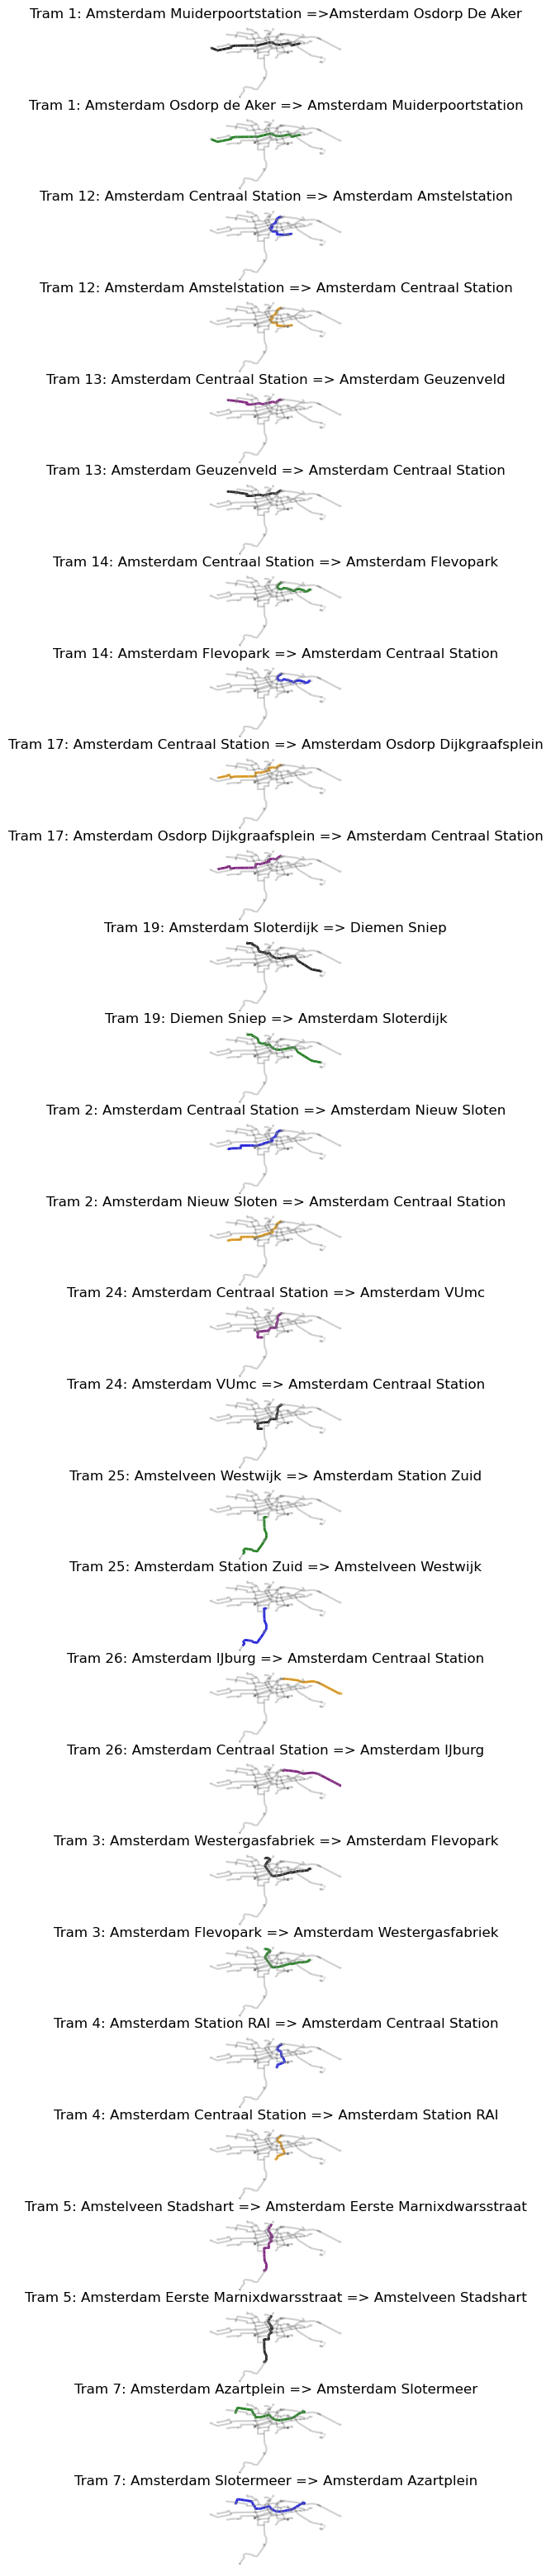

In [34]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, tram_edges = tram(city_tram_stations, edges, nodes, city_tram_routes, city='Amsterdam')

In [35]:
tram_edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  2199     1496    594   11.280287  0.000806       11   
2200    None  2200      562   1072   12.010525  0.000858       12   
2201    None  2201     1497    561   81.765515  0.005840       81   
2202    None  2202      566   1079   12.587379  0.000899       12   
2203    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  
0          (0, 1)       (1, 0)  
1          (2, 3)       (3, 2)  
2          (4, 5)       (5, 4)  
3          (6, 7)       (7, 6)  
4       (8, 1730)    (1730, 8)  
...           ...          ...  
2199  (1496, 594)  (594, 1496)  
2200  (562, 1072)  (1072, 562)  
2201  (1497, 561)  (561, 1497)  
2202  (566, 1079)  (1079, 566)  
2203   (552, 565)   (565, 552)  

[2204 rows x 12 columns]

## Add columns to nodes

In [36]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [37]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   21                Muiderpoortstation  POINT (4.9326128 52.3607965)   
 1    0                      Dapperstraat  POINT (4.9289422 52.3609314)   
 2    6                    Linnaeusstraat  POINT (4.9257029 52.3601162)   
 3    7                         Beukenweg  POINT (4.9167422 52.3590732)   
 4    4         Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)   
 5    3                      Weesperplein  POINT (4.9071213 52.3610021)   
 6   22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 7    5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 8    1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 9   23                       Leidseplein  POINT (4.8810698 52.3632085)   
 10  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 11  24            Jan Pieter Hei

In [38]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, nodes)

In [39]:
city_tram_new_nodes

geometry  degree    id                       name  \
0    POINT (4.93261 52.36080)       2  1341         Muiderpoortstation   
1    POINT (4.92894 52.36093)       2  1503               Dapperstraat   
2    POINT (4.92570 52.36012)       2  1606             Linnaeusstraat   
3    POINT (4.91674 52.35907)       2  1612                  Beukenweg   
4    POINT (4.91359 52.36235)       2  1598  Korte 's-Gravesandestraat   
..                        ...     ...   ...                        ...   
413  POINT (4.92630 52.36814)       2  1559      Eerste Coehoornstraat   
414  POINT (4.92960 52.37020)       2  1808    Eerste Leeghwaterstraat   
415  POINT (4.93483 52.37301)       2  1515               Rietlandpark   
416  POINT (4.93817 52.37346)       2  1751        C. van Eesterenlaan   
417  POINT (4.93735 52.37682)       2   414                 Azartplein   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
413  4.926300  52.368143  (4.9263002, 52.3681426)   
414  4.929600  52.370198  (4.9295997, 52.3701978)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   
416  4.938170  52.373460  (4.9381702, 52.3734596)   
417  4.937347  52.376818  (4.9373469, 52.3768181)   

                                       route_name_list route       ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram  1, 19, 7   
..                                                 ...   ...       ...   
413  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
414  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram     26, 7   
416  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
417  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   

     transfer  
0        1, 3  
1        1, 3  
2        1, 3  
3        1, 3  
4    1, 19, 7  
..        ...  
413      None  
414      None  
415     26, 7  
416      None  
417      None  

[418 rows x 11 columns]

In [40]:
# city_tram_new_nodes.to_excel('./city_tram_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [41]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [42]:
city_tram_transfer_stations_df

geometry  degree    id                       name  \
0    POINT (4.93261 52.36080)       2  1341         Muiderpoortstation   
1    POINT (4.92894 52.36093)       2  1503               Dapperstraat   
2    POINT (4.92570 52.36012)       2  1606             Linnaeusstraat   
3    POINT (4.91674 52.35907)       2  1612                  Beukenweg   
4    POINT (4.91359 52.36235)       2  1598  Korte 's-Gravesandestraat   
..                        ...     ...   ...                        ...   
393  POINT (4.84859 52.37333)       2  1642        Jan van Galenstraat   
408  POINT (4.84872 52.37298)       2  1802        Jan van Galenstraat   
409  POINT (4.85007 52.37041)       2  1888              Mercatorplein   
411  POINT (4.91857 52.36337)       2  1803             Alexanderplein   
415  POINT (4.93483 52.37301)       2  1515               Rietlandpark   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
393  4.848589  52.373332  (4.8485891, 52.3733319)   
408  4.848724  52.372983  (4.8487242, 52.3729826)   
409  4.850068  52.370406  (4.8500681, 52.3704058)   
411  4.918568  52.363371  (4.9185684, 52.3633708)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   

                                       route_name_list route        ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram       1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram   1, 19, 7   
..                                                 ...   ...        ...   
393  Tram 7: Amsterdam Azartplein => Amsterdam Slot...  tram  13, 19, 7   
408  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram  13, 19, 7   
409  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram      13, 7   
411  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram  14, 19, 7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram      26, 7   

      transfer  
0         1, 3  
1         1, 3  
2         1, 3  
3         1, 3  
4     1, 19, 7  
..         ...  
393  13, 19, 7  
408  13, 19, 7  
409      13, 7  
411  14, 19, 7  
415      26, 7  

[183 rows x 11 columns]

In [43]:
len(city_tram_transfer_stations_df)

183

## Add columns to edges

In [44]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges, city_tram_routes)

In [45]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0     7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 1   770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 2   770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 3   770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 4   770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 ..        ...                                                ...     ...   
 91   26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 92  322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 93  322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 94  322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 95  322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 
    ser

In [46]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,edges)

In [47]:
city_tram_new_edges

osm_id                                           geometry railway  \
0        7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
1        7045616  LINESTRING (4.934085 52.3609657, 4.9340765 52....    tram   
2        7045675  LINESTRING (4.9337809 52.3611734, 4.9339017 52...    tram   
3        7045689  LINESTRING (4.9394 52.361617, 4.9385742 52.361...    tram   
4        7045994  LINESTRING (4.9157261 52.365067, 4.9157046 52....    tram   
...          ...                                                ...     ...   
2199  1185084715  LINESTRING (4.8520736 52.3479443, 4.8521852 52...    tram   
2200  1185084716  LINESTRING (4.852325 52.3480075, 4.852489 52.3...    tram   
2201  1185084717  LINESTRING (4.8516012 52.3470208, 4.8519064 52...    tram   
2202  1185084718  LINESTRING (4.8522982 52.348033, 4.8524709 52....    tram   
2203  1185084719  LINESTRING (4.851576 52.3470746, 4.8518677 52....    tram   

     service    id  from_id  to_id    distance      time  weights  \
0       None     0        0      1   28.561299  0.002040       28   
1       None     1        2      3  146.082551  0.010434      146   
2       None     2        4      5  390.987463  0.027928      390   
3       None     3        6      7  345.247175  0.024661      345   
4       None     4        8   1730   35.152166  0.002511       35   
...      ...   ...      ...    ...         ...       ...      ...   
2199    None  2199     1496    594   11.280287  0.000806       11   
2200    None  2200      562   1072   12.010525  0.000858       12   
2201    None  2201     1497    561   81.765515  0.005840       81   
2202    None  2202      566   1079   12.587379  0.000899       12   
2203    None  2203      552    565   78.206965  0.005586       78   

          to_from      from_to  count_weight  \
0          (0, 1)       (1, 0)           1.0   
1          (2, 3)       (3, 2)           NaN   
2          (4, 5)       (5, 4)           1.0   
3          (6, 7)       (7, 6)           1.0   
4       (8, 1730)    (1730, 8)           1.0   
...           ...          ...           ...   
2199  (1496, 594)  (594, 1496)           NaN   
2200  (562, 1072)  (1072, 562)           NaN   
2201  (1497, 561)  (561, 1497)           NaN   
2202  (566, 1079)  (1079, 566)           NaN   
2203   (552, 565)   (565, 552)           NaN   

                                        route_name_list route  ref  
0     Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram    1  
1                                                   NaN   NaN  NaN  
2     Tram 3: Amsterdam Westergasfabriek => Amsterda...  tram    3  
3     Tram 3: Amsterdam Flevopark => Amsterdam Weste...  tram    3  
4     Tram 14: Amsterdam Flevopark => Amsterdam Cent...  tram   14  
...                                                 ...   ...  ...  
2199                                                NaN   NaN  NaN  
2200                                                NaN   NaN  NaN  
2201                                                NaN   NaN  NaN  
2202                                                NaN   NaN  NaN  
2203                                                NaN   NaN  NaN  

[2204 rows x 16 columns]

# Bus-Amsterdam

## Generate bus networks

In [48]:
city_bus_stations, edges, nodes, city_bus_routes = prepare_bus(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████| 71634/71634 [00:08<00:00, 8411.91it/s]


In [49]:
edges

osm_id                                           geometry  service  \
0         4436684  LINESTRING (4.9683596 52.3558775, 4.9683345 52...    steps   
1         4495957  LINESTRING (4.8601784 52.357593, 4.8601399 52....    steps   
2         4496429  LINESTRING (4.8743983 52.358788, 4.8744747 52....  service   
3         4727308  LINESTRING (4.9563878 52.377293, 4.9564629 52....     path   
4         4727308  LINESTRING (4.9564856 52.376881, 4.9564944 52....     path   
...           ...                                                ...      ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....  service   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...  service   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...  service   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     path   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...  service   

          id  from_id  to_id   distance      time  weights         to_from  \
0          0        0      1   4.049164  0.000324        4          (0, 1)   
1          1        2      3   7.754968  0.000620        7          (2, 3)   
2          2        4      5  68.807947  0.005505       68          (4, 5)   
3          3        6  65237  46.383298  0.003711       46      (6, 65237)   
4          4    65237      7   2.090290  0.000167        2      (65237, 7)   
...      ...      ...    ...        ...       ...      ...             ...   
71623  71623    65586  65587  29.884042  0.002391       29  (65586, 65587)   
71624  71624    65588  65589  19.267219  0.001541       19  (65588, 65589)   
71625  71625    65590  65591  34.723141  0.002778       34  (65590, 65591)   
71626  71626    65592  65593  65.462451  0.005237       65  (65592, 65593)   
71627  71627    65594  65595  41.888083  0.003351       41  (65594, 65595)   

              from_to railway  
0              (1, 0)     bus  
1              (3, 2)     bus  
2              (5, 4)     bus  
3          (65237, 6)     bus  
4          (7, 65237)     bus  
...               ...     ...  
71623  (65587, 65586)     bus  
71624  (65589, 65588)     bus  
71625  (65591, 65590)     bus  
71626  (65593, 65592)     bus  
71627  (65595, 65594)     bus  

[71628 rows x 12 columns]

In [50]:
nodes

geometry  degree     id
0      POINT (4.9683596 52.3558775)       1      0
1      POINT (4.9683118 52.3558559)       1      1
2       POINT (4.8601784 52.357593)       1      2
3      POINT (4.8601399 52.3576586)       1      3
4       POINT (4.8743983 52.358788)       1      4
...                             ...     ...    ...
68437  POINT (4.8808204 52.3586774)       0  68437
68438  POINT (4.8688259 52.3392455)       2  68438
68439  POINT (4.8690257 52.3316423)       2  68439
68440  POINT (4.8705297 52.3165252)       2  68440
68441  POINT (4.8909317 52.4173556)       2  68441

[68442 rows x 3 columns]

In [51]:
city_bus_routes

osm_id route                                to  \
31       73789   bus      Amsterdam Muiderpoortstation   
37      146350   bus           Schiphol, Airport/Plaza   
44      156123   bus                   Marken Minneweg   
52      161790   bus  Nieuw Vennep, P+R Getsewoud Zuid   
91      169215   bus                  Haarlem, Station   
...        ...   ...                               ...   
1446  13630218   bus          Amsterdam, Station Noord   
1447  13631642   bus         Assendelft, Festina Lente   
1448  13633193   bus                  Zaandam, Station   
1470  14979096   bus  Amsterdam, Station Bijlmer ArenA   
1471  14979097   bus      Almere Haven, Station Buiten   

                                                   name  ref  \
31    Bus 40: Amsterdam Amstelstation => Amsterdam M...   40   
37    Bus 365: Leiden Centraal Station => Schiphol A...  365   
44    Bus 315: Amsterdam Station Noord => Marken Min...  315   
52    Bus 397: Amsterdam Busstation Elandsgracht → N...  397   
91    Bus 300: Amsterdam Bijlmer ArenA → Haarlem Sta...  300   
...                                                 ...  ...   
1446  Bus 292: Zaandam De Vlinder => Amsterdam Stati...  292   
1447  Bus 63: Zaandam Station => Assendelft Festina ...   63   
1448  Bus 63: Assendelft Festina Lente => Zaandam St...   63   
1470  Bus 330: Almere Station Buiten => Amsterdam St...  330   
1471  Bus 330: Amsterdam Station Bijlmer ArenA => Al...  330   

                     network service  \
31    Stadsvervoer Amsterdam    None   
37        Zuid-Holland Noord    None   
44                 Waterland    None   
52     Amstelland-Meerlanden    None   
91     Amstelland-Meerlanden    None   
...                      ...     ...   
1446              Zaanstreek    None   
1447              Zaanstreek    None   
1448              Zaanstreek    None   
1470       Busvervoer Almere    None   
1471       Busvervoer Almere    None   

                                               geometry  
31    MULTILINESTRING ((4.91869 52.34617, 4.91868 52...  
37    MULTILINESTRING ((4.76218 52.30830, 4.76200 52...  
44    MULTILINESTRING ((4.93321 52.40187, 4.93311 52...  
52    MULTILINESTRING ((4.87678 52.36968, 4.87687 52...  
91    MULTILINESTRING ((4.94705 52.31143, 4.94711 52...  
...                                                 ...  
1446  MULTILINESTRING ((4.85659 52.42963, 4.85664 52...  
1447  MULTILINESTRING ((4.81643 52.43588, 4.81651 52...  
1448  MULTILINESTRING ((4.81436 52.43590, 4.81452 52...  
1470  MULTILINESTRING ((5.05775 52.32570, 5.05723 52...  
1471  MULTILINESTRING ((4.94759 52.31119, 4.94762 52...  

[319 rows x 8 columns]

In [52]:
len(city_bus_routes)

319

In [53]:
city_bus_routes = city_bus_routes.loc[city_bus_routes.network == 'Stadsvervoer Amsterdam']
city_bus_routes = city_bus_routes.loc[city_bus_routes.service != 'night']

In [54]:
city_bus_routes, check_name = check_bus_routes(city_bus_stations, city_bus_routes)

In [55]:
replacement_dict = {
    'Amsterdam, ': '',
    'Amsterdam': '',
    'Weesp Station': 'Station',
    'Osdorp De Aker': 'Matterhorn',
    'Schiphol, Airport/Plaza': 'Schiphol, Airport',
    'De Boelelaan': 'De Boelelaan/De Klencke'
}
replacement_dict1 = {
    'Amsterdam, ': '',
    'Amsterdam': '',
}

city_bus_stations['name'] = city_bus_stations['name'].replace(replacement_dict1, regex=True).str.strip()

city_bus_stations, city_bus_routes, check_name = recheck_bus_routes(replacement_dict, city_bus_stations, city_bus_routes)

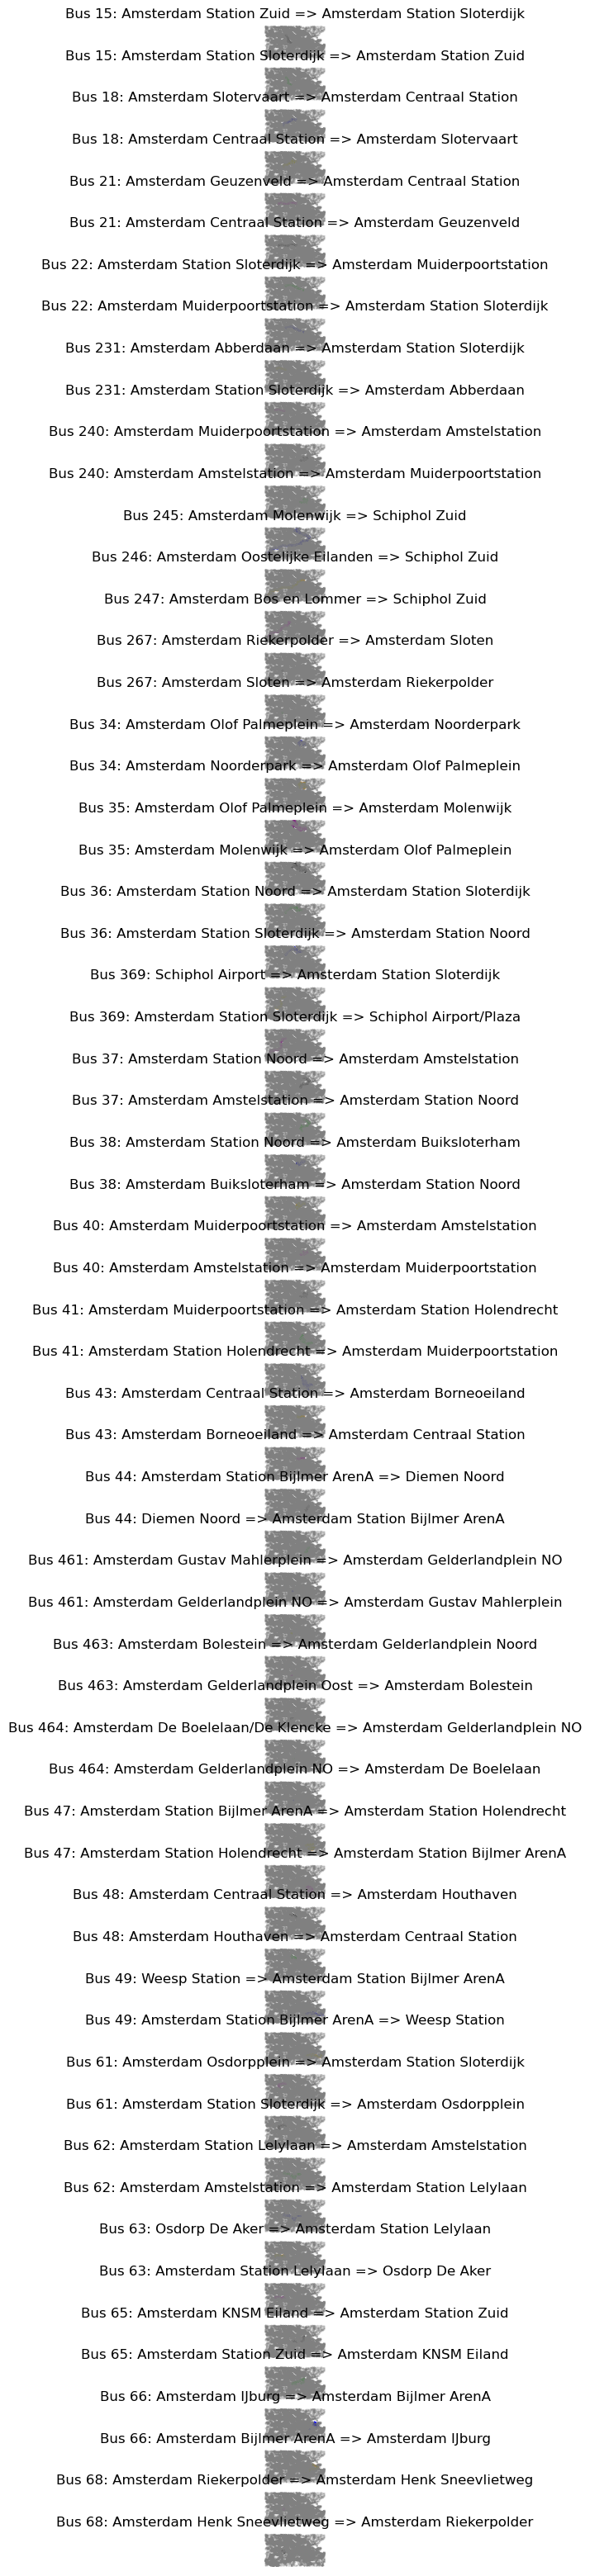

In [56]:
city_bus_order_route_dict, city_bus_shortest_path_pairs, city_bus_shortest_path_edges, bus_edges = bus(city_bus_stations, edges, nodes, city_bus_routes, city='Amsterdam')

In [57]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

<Axes: >

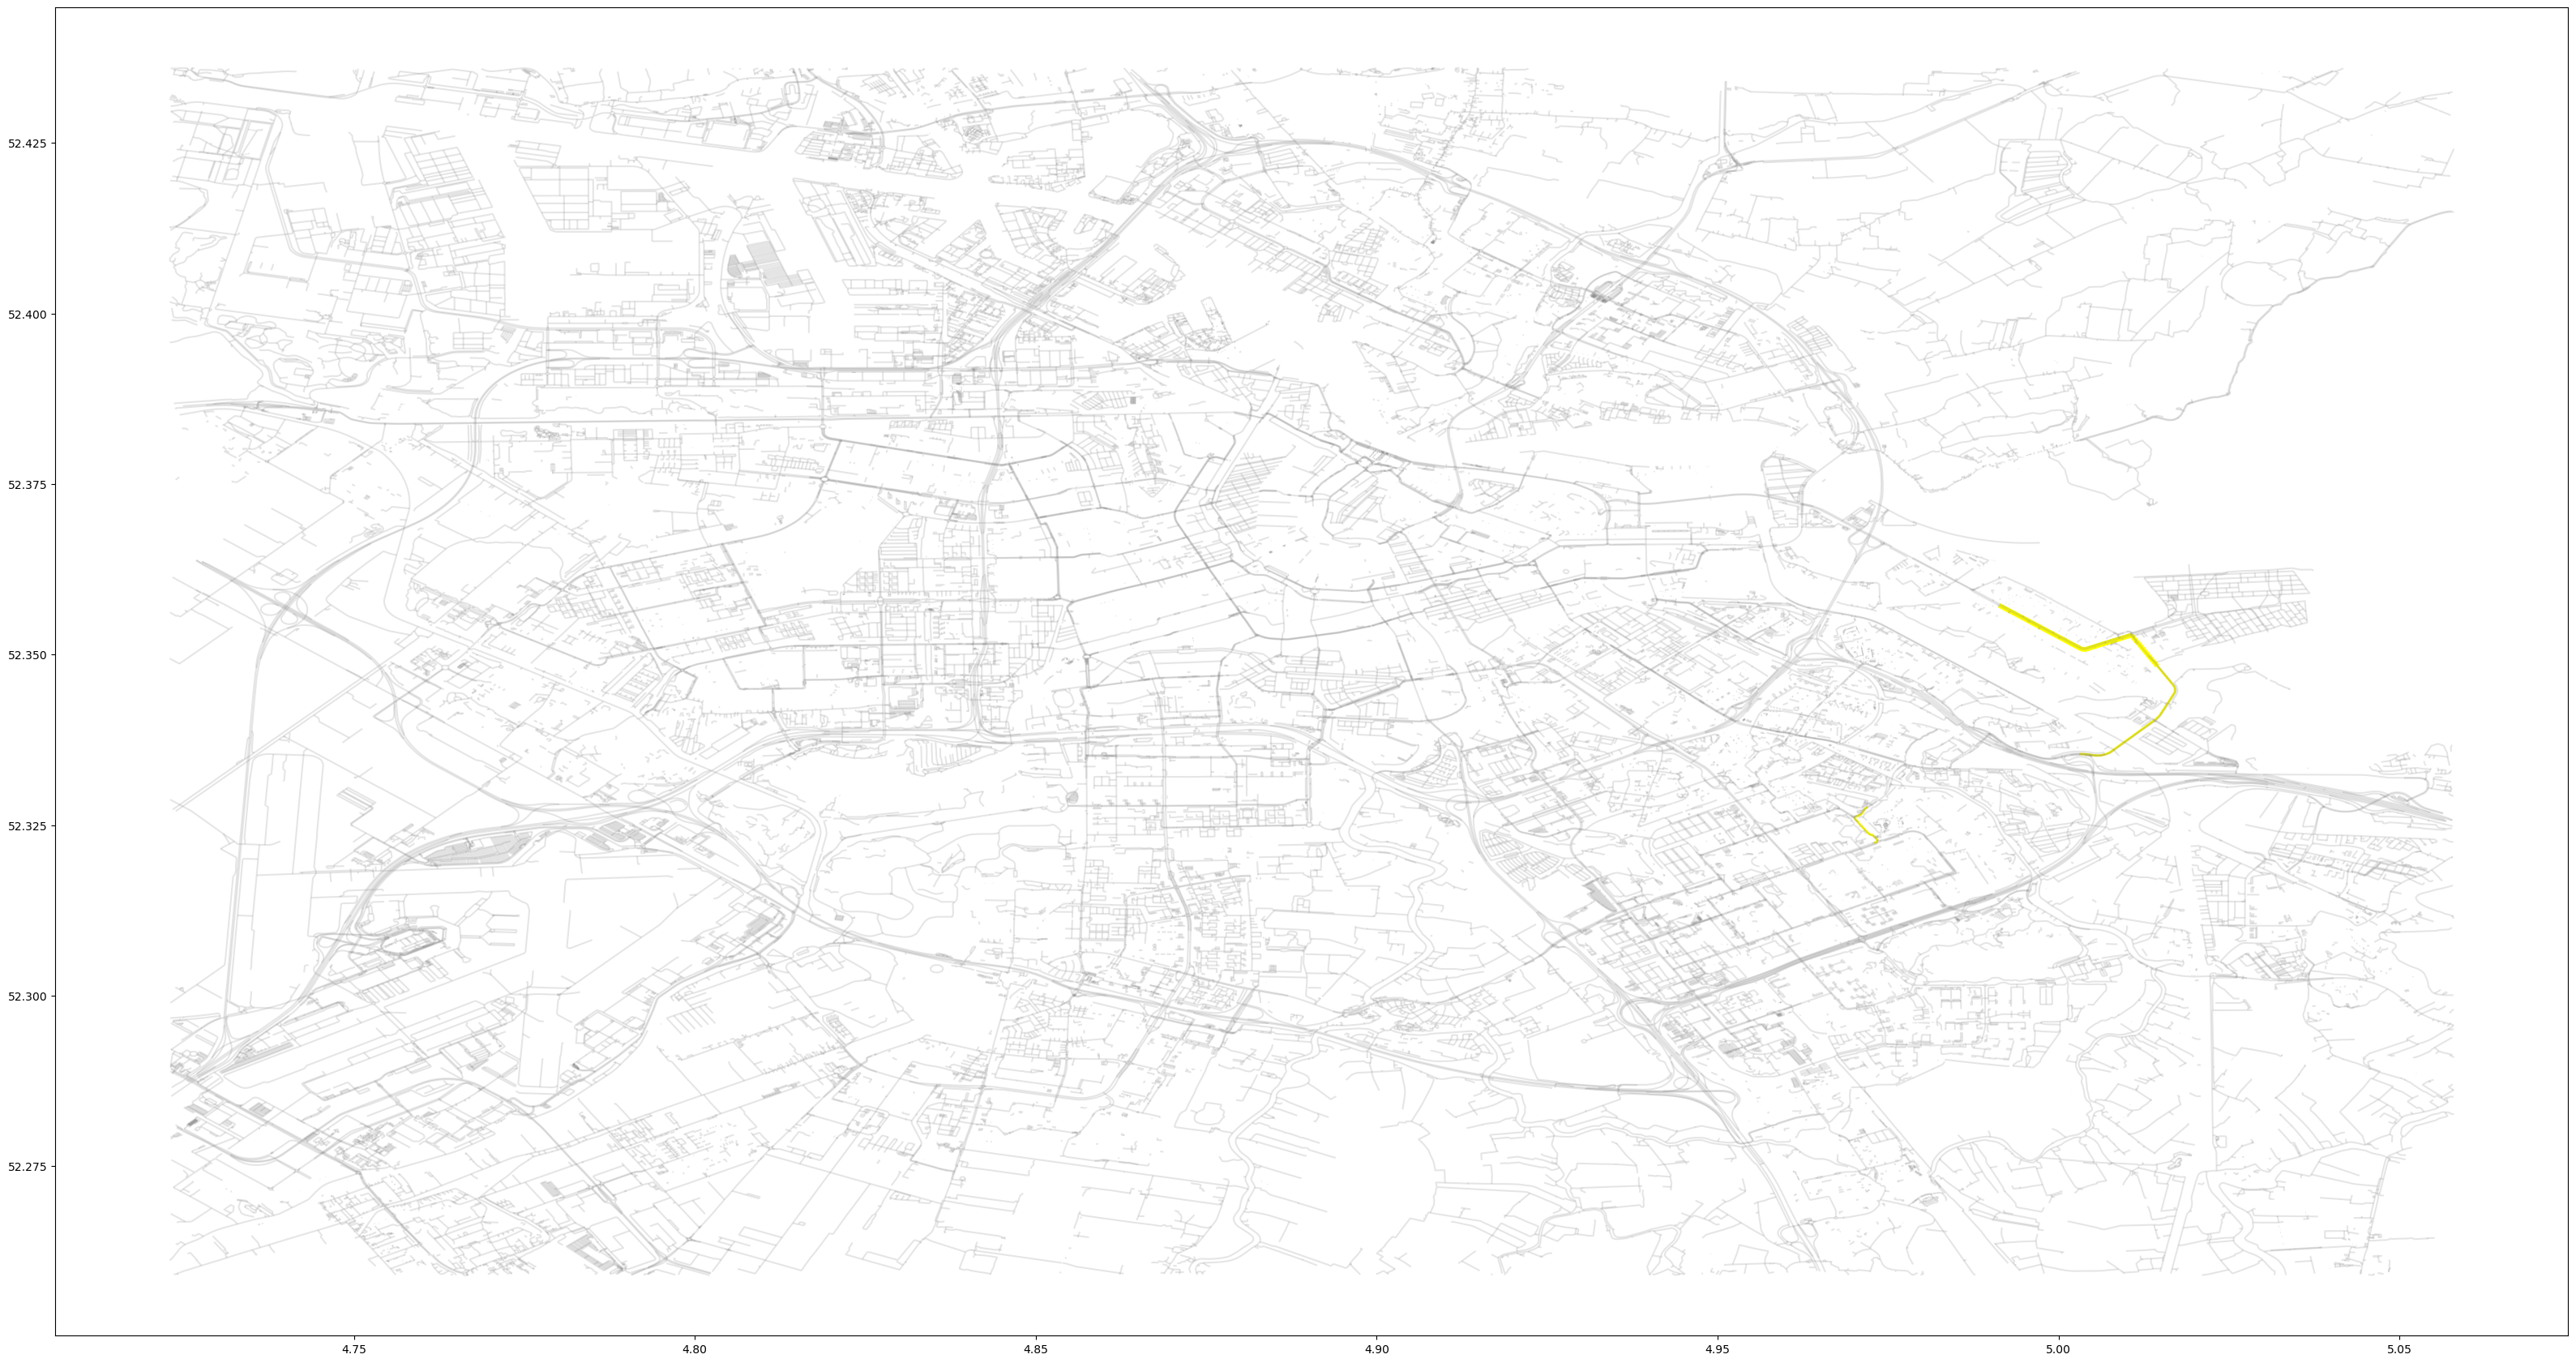

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
gpd.GeoDataFrame(bus_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)
gpd.GeoDataFrame(city_bus_shortest_path_edges['Bus 66: Amsterdam IJburg => Amsterdam Bijlmer ArenA'].copy()).plot(ax=ax, zorder=1,
                                                                     linewidth=(city_bus_shortest_path_edges['Bus 66: Amsterdam IJburg => Amsterdam Bijlmer ArenA'].count_weight) * 2,
                                                                     color='yellow')

In [59]:
len(city_bus_order_route_dict)

61

In [60]:
bus_edges

osm_id                                           geometry  service  \
0         4436684  LINESTRING (4.9683596 52.3558775, 4.9683345 52...    steps   
1         4495957  LINESTRING (4.8601784 52.357593, 4.8601399 52....    steps   
2         4496429  LINESTRING (4.8743983 52.358788, 4.8744747 52....  service   
3         4727308  LINESTRING (4.9563878 52.377293, 4.9564629 52....     path   
4         4727308  LINESTRING (4.9564856 52.376881, 4.9564944 52....     path   
...           ...                                                ...      ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....  service   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...  service   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...  service   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     path   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...  service   

          id  from_id  to_id   distance      time  weights         to_from  \
0          0        0      1   4.049164  0.000324        4          (0, 1)   
1          1        2      3   7.754968  0.000620        7          (2, 3)   
2          2        4      5  68.807947  0.005505       68          (4, 5)   
3          3        6  65237  46.383298  0.003711       46      (6, 65237)   
4          4    65237      7   2.090290  0.000167        2      (65237, 7)   
...      ...      ...    ...        ...       ...      ...             ...   
71623  71623    65586  65587  29.884042  0.002391       29  (65586, 65587)   
71624  71624    65588  65589  19.267219  0.001541       19  (65588, 65589)   
71625  71625    65590  65591  34.723141  0.002778       34  (65590, 65591)   
71626  71626    65592  65593  65.462451  0.005237       65  (65592, 65593)   
71627  71627    65594  65595  41.888083  0.003351       41  (65594, 65595)   

              from_to railway  
0              (1, 0)     bus  
1              (3, 2)     bus  
2              (5, 4)     bus  
3          (65237, 6)     bus  
4          (7, 65237)     bus  
...               ...     ...  
71623  (65587, 65586)     bus  
71624  (65589, 65588)     bus  
71625  (65591, 65590)     bus  
71626  (65593, 65592)     bus  
71627  (65595, 65594)     bus  

[71628 rows x 12 columns]

## Add columns to nodes

In [61]:
city_bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_order_route_dict, city_bus_routes)

In [62]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

In [63]:
city_bus_new_nodes = add_columns_to_nodes(city_bus_order_route_dict, nodes)

In [64]:
city_bus_new_nodes

geometry  degree     id                   name     geo_x  \
0    POINT (4.87204 52.34082)       2  14779           Station Zuid  4.872035   
1    POINT (4.86829 52.34289)       2  67476    Prinses Irenestraat  4.868290   
2    POINT (4.86586 52.34629)       2  68204           Olympiaplein  4.865862   
3    POINT (4.85835 52.34525)       2  68196             Olympiaweg  4.858347   
4    POINT (4.85763 52.34922)       2  68341  Haarlemmermeerstation  4.857632   
..                        ...     ...    ...                    ...       ...   
752  POINT (4.99474 52.35561)       2  67471         Diemerparklaan  4.994741   
753  POINT (4.82444 52.34041)       3  15699    John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                    IBM  4.827888   
755  POINT (4.82867 52.34260)       3  26843             Parkeerdek  4.828668   
756  POINT (4.83306 52.34574)       2  31909      Henk Sneevlietweg  4.833059   

         geo_y         coordinate_value  \
0    52.340819  (4.8720355, 52.3408188)   
1    52.342894  (4.8682898, 52.3428941)   
2    52.346286   (4.865862, 52.3462864)   
3    52.345247  (4.8583469, 52.3452468)   
4    52.349218  (4.8576315, 52.3492179)   
..         ...                      ...   
752  52.355608   (4.9947414, 52.355608)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   
755  52.342595  (4.8286682, 52.3425954)   
756  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
2    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
3    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
..                                                 ...   ...          ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus           66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   

        transfer  
0     15, 62, 65  
1    15, 246, 65  
2           None  
3           None  
4         15, 62  
..           ...  
752         None  
753      267, 68  
754      267, 68  
755         None  
756         None  

[757 rows x 11 columns]

### retrive all transfer stations on each route

In [65]:
city_bus_transfer_stations_df = all_transfer_stations_df(city_bus_new_nodes)

In [66]:
city_bus_transfer_stations_df

geometry  degree     id                   name     geo_x  \
0    POINT (4.87204 52.34082)       2  14779           Station Zuid  4.872035   
1    POINT (4.86829 52.34289)       2  67476    Prinses Irenestraat  4.868290   
4    POINT (4.85763 52.34922)       2  68341  Haarlemmermeerstation  4.857632   
5    POINT (4.85667 52.35121)       2  68268             Zeilstraat  4.856667   
6    POINT (4.85607 52.35137)       2  68266        Amstelveenseweg  4.856072   
..                        ...     ...    ...                    ...       ...   
740  POINT (4.96581 52.31983)       0  66747             Tulastraat  4.965810   
741  POINT (4.97152 52.32169)       0  67123      Annie Romeinplein  4.971517   
742  POINT (4.97323 52.32306)       2  67461     Station Ganzenhoef  4.973228   
753  POINT (4.82444 52.34041)       3  15699    John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                    IBM  4.827888   

         geo_y         coordinate_value  \
0    52.340819  (4.8720355, 52.3408188)   
1    52.342894  (4.8682898, 52.3428941)   
4    52.349218  (4.8576315, 52.3492179)   
5    52.351210  (4.8566667, 52.3512098)   
6    52.351367  (4.8560722, 52.3513667)   
..         ...                      ...   
740  52.319830    (4.96581, 52.3198302)   
741  52.321685  (4.9715166, 52.3216851)   
742  52.323056   (4.9732278, 52.323056)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
5    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
6    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 62   
..                                                 ...   ...          ...   
740  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus   41, 47, 66   
741  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus       41, 66   
742  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus       41, 66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   

        transfer  
0     15, 62, 65  
1    15, 246, 65  
4         15, 62  
5         15, 62  
6    15, 246, 62  
..           ...  
740   41, 47, 66  
741       41, 66  
742       41, 66  
753      267, 68  
754      267, 68  

[351 rows x 11 columns]

In [67]:
len(city_bus_transfer_stations_df)

351

## Add columns to edges

In [68]:
city_bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_shortest_path_edges, city_bus_routes)

In [69]:
city_bus_shortest_path_edges

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':          osm_id                                           geometry  \
 0      26956728  LINESTRING (4.8720355 52.3408188, 4.8717707 52...   
 1      26956728  LINESTRING (4.8717707 52.3408097, 4.8716246 52...   
 2      26956728  LINESTRING (4.8705601 52.3407731, 4.8702988 52...   
 3      26956728  LINESTRING (4.8702988 52.3407626, 4.868856 52....   
 4      26982261  LINESTRING (4.8685173 52.3409372, 4.8684681 52...   
 ..          ...                                                ...   
 123   935010194  LINESTRING (4.8435054 52.3848361, 4.8436903 52...   
 124  1020818639  LINESTRING (4.8438138 52.3847277, 4.8438383 52...   
 125  1020818640  LINESTRING (4.8428612 52.3848254, 4.8435054 52...   
 126  1020818641  LINESTRING (4.8438898 52.3843611, 4.8439048 52...   
 127  1147115688  LINESTRING (4.8438493 52.3844829, 4.8438898 52...   
 
            service     id  from_id  to_id    distance      time  weights  \
 0 

In [70]:
city_bus_new_edges = add_columns_to_edges(city_bus_shortest_path_edges,edges)

In [71]:
city_bus_new_edges

osm_id                                           geometry railway  \
0         4436684  LINESTRING (4.9683596 52.3558775, 4.9683345 52...     bus   
1         4495957  LINESTRING (4.8601784 52.357593, 4.8601399 52....     bus   
2         4496429  LINESTRING (4.8743983 52.358788, 4.8744747 52....     bus   
3         4727308  LINESTRING (4.9563878 52.377293, 4.9564629 52....     bus   
4         4727308  LINESTRING (4.9564856 52.376881, 4.9564944 52....     bus   
...           ...                                                ...     ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....     bus   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...     bus   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...     bus   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     bus   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...     bus   

       service     id  from_id  to_id   distance      time  weights  \
0        steps      0        0      1   4.049164  0.000324        4   
1        steps      1        2      3   7.754968  0.000620        7   
2      service      2        4      5  68.807947  0.005505       68   
3         path      3        6  65237  46.383298  0.003711       46   
4         path      4    65237      7   2.090290  0.000167        2   
...        ...    ...      ...    ...        ...       ...      ...   
71623  service  71623    65586  65587  29.884042  0.002391       29   
71624  service  71624    65588  65589  19.267219  0.001541       19   
71625  service  71625    65590  65591  34.723141  0.002778       34   
71626     path  71626    65592  65593  65.462451  0.005237       65   
71627  service  71627    65594  65595  41.888083  0.003351       41   

              to_from         from_to  count_weight route_name_list route  ref  
0              (0, 1)          (1, 0)           NaN             NaN   NaN  NaN  
1              (2, 3)          (3, 2)           NaN             NaN   NaN  NaN  
2              (4, 5)          (5, 4)           NaN             NaN   NaN  NaN  
3          (6, 65237)      (65237, 6)           NaN             NaN   NaN  NaN  
4          (65237, 7)      (7, 65237)           NaN             NaN   NaN  NaN  
...               ...             ...           ...             ...   ...  ...  
71623  (65586, 65587)  (65587, 65586)           NaN             NaN   NaN  NaN  
71624  (65588, 65589)  (65589, 65588)           NaN             NaN   NaN  NaN  
71625  (65590, 65591)  (65591, 65590)           NaN             NaN   NaN  NaN  
71626  (65592, 65593)  (65593, 65592)           NaN             NaN   NaN  NaN  
71627  (65594, 65595)  (65595, 65594)           NaN             NaN   NaN  NaN  

[71628 rows x 16 columns]

# Multi networks

### Merge three networks

In [72]:
three_networks_edges = pd.concat([sub_new_edges,city_tram_new_edges,city_bus_new_edges])
# three_networks_nodes = pd.concat([sub_new_nodes_transfer_all,city_tram_new_nodes_transfer_all,city_bus_new_nodes_transfer_all]) 
three_networks_nodes = pd.concat([sub_new_nodes,city_tram_new_nodes,city_bus_new_nodes]) 
three_networks_routes = pd.concat([sub_routes,city_tram_routes,city_bus_routes])

In [73]:
three_networks_edges

osm_id                                           geometry railway  \
0        23157994  LINESTRING (4.9236699 52.3361909, 4.9236979 52...  subway   
1        23158053  LINESTRING (4.9642294 52.2945339, 4.9644259 52...  subway   
2        23158054  LINESTRING (4.9622901 52.2955678, 4.9624673 52...  subway   
3        23189033  LINESTRING (4.8467318 52.3952137, 4.8471439 52...  subway   
4        23189039  LINESTRING (4.8409161 52.3937679, 4.8416087 52...  subway   
...           ...                                                ...     ...   
71623  1185077512  LINESTRING (4.795149 52.3318873, 4.7953163 52....     bus   
71624  1185077519  LINESTRING (4.7974835 52.3325307, 4.7972201 52...     bus   
71625  1185077520  LINESTRING (4.7967795 52.3323057, 4.7972519 52...     bus   
71626  1185077524  LINESTRING (4.7997017 52.3324389, 4.7997688 52...     bus   
71627  1185077528  LINESTRING (4.7988313 52.3335157, 4.7987286 52...     bus   

       service     id  from_id  to_id    distance      time  weights  \
0         None      0        0      1  258.660599  0.010346      258   
1         None      1        2      3  215.433271  0.008617      215   
2         None      2        4      5  121.794737  0.004872      121   
3         None      3        6      7   28.046592  0.001122       28   
4         None      4        8    492  382.935219  0.015317      382   
...        ...    ...      ...    ...         ...       ...      ...   
71623  service  71623    65586  65587   29.884042  0.002391       29   
71624  service  71624    65588  65589   19.267219  0.001541       19   
71625  service  71625    65590  65591   34.723141  0.002778       34   
71626     path  71626    65592  65593   65.462451  0.005237       65   
71627  service  71627    65594  65595   41.888083  0.003351       41   

              to_from         from_to  count_weight  \
0              (0, 1)          (1, 0)           1.0   
1              (2, 3)          (3, 2)           1.0   
2              (4, 5)          (5, 4)           1.0   
3              (6, 7)          (7, 6)           NaN   
4            (8, 492)        (492, 8)           1.0   
...               ...             ...           ...   
71623  (65586, 65587)  (65587, 65586)           NaN   
71624  (65588, 65589)  (65589, 65588)           NaN   
71625  (65590, 65591)  (65591, 65590)           NaN   
71626  (65592, 65593)  (65593, 65592)           NaN   
71627  (65594, 65595)  (65595, 65594)           NaN   

                                 route_name_list   route     ref  
0      Metro 51: Isolatorweg => Centraal Station  subway      51  
1                  Metro 50: Isolatorweg => Gein  subway  50, 54  
2                  Metro 50: Isolatorweg => Gein  subway  50, 54  
3                                            NaN     NaN     NaN  
4                  Metro 50: Isolatorweg => Gein  subway  50, 51  
...                                          ...     ...     ...  
71623                                        NaN     NaN     NaN  
71624                                        NaN     NaN     NaN  
71625                                        NaN     NaN     NaN  
71626                                        NaN     NaN     NaN  
71627                                        NaN     NaN     NaN  

[74794 rows x 16 columns]

In [74]:
three_networks_nodes

geometry  degree     id                 name     geo_x  \
0    POINT (4.98916 52.29641)       2    328                 Gein  4.989161   
1    POINT (4.97400 52.29564)       2    855           Reigersbos  4.974000   
2    POINT (4.96013 52.29813)       2    854          Holendrecht  4.960126   
3    POINT (4.95213 52.30687)       2    810            Bullewijk  4.952129   
4    POINT (4.94762 52.31181)       2    809        Bijlmer ArenA  4.947618   
..                        ...     ...    ...                  ...       ...   
752  POINT (4.99474 52.35561)       2  67471       Diemerparklaan  4.994741   
753  POINT (4.82444 52.34041)       3  15699  John M. Keynesplein  4.824444   
754  POINT (4.82789 52.34108)       2  11244                  IBM  4.827888   
755  POINT (4.82867 52.34260)       3  26843           Parkeerdek  4.828668   
756  POINT (4.83306 52.34574)       2  31909    Henk Sneevlietweg  4.833059   

         geo_y         coordinate_value  \
0    52.296407  (4.9891612, 52.2964067)   
1    52.295637  (4.9740002, 52.2956365)   
2    52.298132  (4.9601264, 52.2981319)   
3    52.306869   (4.9521292, 52.306869)   
4    52.311806   (4.9476178, 52.311806)   
..         ...                      ...   
752  52.355608   (4.9947414, 52.355608)   
753  52.340413    (4.824444, 52.340413)   
754  52.341080   (4.827888, 52.3410803)   
755  52.342595  (4.8286682, 52.3425954)   
756  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list   route      ref  \
0                        Metro 50: Gein => Isolatorweg  subway   50, 54   
1                        Metro 50: Gein => Isolatorweg  subway   50, 54   
2                        Metro 50: Gein => Isolatorweg  subway   50, 54   
3                        Metro 50: Gein => Isolatorweg  subway   50, 54   
4                        Metro 50: Gein => Isolatorweg  subway   50, 54   
..                                                 ...     ...      ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...     bus       66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   

    transfer  
0     50, 54  
1     50, 54  
2     50, 54  
3     50, 54  
4     50, 54  
..       ...  
752     None  
753  267, 68  
754  267, 68  
755     None  
756     None  

[1261 rows x 11 columns]

In [75]:
type(three_networks_nodes.geometry[0])

geopandas.geoseries.GeoSeries

In [76]:
three_networks_routes

osm_id   route                   to  \
0      18683  subway          Isolatorweg   
1    4515354  subway                 Gein   
2      31249  subway          Isolatorweg   
3    4515355  subway     Centraal Station   
4    8466667  subway                 Zuid   
..       ...     ...                  ...   
58    365791     bus     Vennepluimstraat   
59  11720818     bus    Henk Sneevlietweg   
60  11720819     bus  John M. Keynesplein   
61   6096663     bus    Henk Sneevlietweg   
62   5860193     bus  John M. Keynesplein   

                                                 name ref  \
0                       Metro 50: Gein => Isolatorweg  50   
1                       Metro 50: Isolatorweg => Gein  50   
2           Metro 51: Centraal Station => Isolatorweg  51   
3           Metro 51: Isolatorweg => Centraal Station  51   
4                             Metro 52: Noord => Zuid  52   
..                                                ...  ..   
58  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...  66   
59  Bus 68: Amsterdam Riekerpolder => Amsterdam He...  68   
60  Bus 68: Amsterdam Henk Sneevlietweg => Amsterd...  68   
61  Bus 68: Amsterdam Riekerpolder => Amsterdam He...  68   
62  Bus 68: Amsterdam Henk Sneevlietweg => Amsterd...  68   

                   network service  \
0   Stadsvervoer Amsterdam    None   
1   Stadsvervoer Amsterdam    None   
2   Stadsvervoer Amsterdam    None   
3   Stadsvervoer Amsterdam    None   
4   Stadsvervoer Amsterdam    None   
..                     ...     ...   
58  Stadsvervoer Amsterdam    None   
59  Stadsvervoer Amsterdam    None   
60  Stadsvervoer Amsterdam    None   
61  Stadsvervoer Amsterdam    None   
62  Stadsvervoer Amsterdam    None   

                                             geometry  
0   MULTILINESTRING ((4.98996 52.29640, 4.98959 52...  
1   MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
2   MULTILINESTRING ((4.90193 52.37689, 4.90202 52...  
3   MULTILINESTRING ((4.83880 52.38842, 4.83897 52...  
4   MULTILINESTRING ((4.93265 52.40228, 4.93269 52...  
..                                                ...  
58  MULTILINESTRING ((4.94749 52.31135, 4.94747 52...  
59  MULTILINESTRING ((4.82522 52.34015, 4.82543 52...  
60  MULTILINESTRING ((4.83306 52.34574, 4.83285 52...  
61  MULTILINESTRING ((4.82444 52.34041, 4.82445 52...  
62  MULTILINESTRING ((4.83306 52.34574, 4.83285 52...  

[101 rows x 8 columns]

In [77]:
merged_order_route_dict = {key: value for d in [sub_order_route_dict, city_tram_order_route_dict, city_bus_order_route_dict] for key, value in d.items()}

In [78]:
merged_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161   
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974   
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126   
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129   
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618   
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398   
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656   
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454   
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 11   8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 12  11    Henk Sneevlietweg  P

# Adding ref_transfer_all column and get three_network_nodes_transfer_all

In [79]:
# convert coordinates in station_df from degree to meter
def convert_deg_to_meter(new_nodes_df):
    # Convert the 'geometry' column to a Point object
    new_nodes_df['geometry'] = new_nodes_df.apply(lambda row: Point(row['geo_x'], row['geo_y']), axis=1)
    
    # Define the coordinate reference systems (CRS)
    crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
    crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

    # Create a transformer to convert from degrees to meters
    transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

    # Apply the transformer to each Point in the 'geometry' column
    new_nodes_df['geometry'] = new_nodes_df['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
    
    return new_nodes_df

In [80]:
def new_nodes_buffer(new_nodes_df,buffer_radius):
    new_nodes_df = convert_deg_to_meter(new_nodes_df)
    node_buffers = []

    for index, row in new_nodes_df.iterrows():
        point = row['geometry']
        buffer = point.buffer(buffer_radius)
        node_buffers.append(buffer)

    buffered_gdf = gpd.GeoDataFrame(geometry=node_buffers)
    buffered_df = pd.DataFrame(buffered_gdf).rename(columns={'geometry': 'buffer_geometry'})
    new_nodes_buffer_geometry = pd.concat([new_nodes_df,buffered_df],axis=1)
    return new_nodes_buffer_geometry

In [81]:
def add_footnote_to_new_nodes(new_nodes_df):
    new_nodes_df = convert_deg_to_meter(new_nodes_df)
    # create a exactly same dataframe with new_nodes_df but name columns by different transportation routes
    rename_cols = {
    "geometry": "geometry"+"_"+new_nodes_df.loc[0,'route'],
    "degree": "degree"+"_"+new_nodes_df.loc[0,'route'],
    "id": "id"+"_"+new_nodes_df.loc[0,'route'],
    "name": "name"+"_"+new_nodes_df.loc[0,'route'],
    "geo_x": "geo_x"+"_"+new_nodes_df.loc[0,'route'],
    "geo_y": "geo_y"+"_"+new_nodes_df.loc[0,'route'],
    "coordinate_value": "coordinate_value"+"_"+new_nodes_df.loc[0,'route'],
    "route_name_list": "route_name_list"+"_"+new_nodes_df.loc[0,'route'],
    "route": "route"+"_"+new_nodes_df.loc[0,'route'],
    "ref": "ref"+"_"+new_nodes_df.loc[0,'route'],
    "transfer": "transfer"+"_"+new_nodes_df.loc[0,'route']
    }
    new_nodes_ftn = new_nodes_df.rename(columns=rename_cols)
    return new_nodes_ftn

In [82]:
def transfer_A_to_B(A_new_nodes_buffer_geometry,B_new_nodes_ftn):
    transfer_stations_A_to_B = pd.DataFrame()
    
    for index, row in A_new_nodes_buffer_geometry.iterrows():
        each_transfer_stations_df = B_new_nodes_ftn[row['buffer_geometry'].intersects(B_new_nodes_ftn.iloc[:, 0])]
        
        if not each_transfer_stations_df.empty:
            replicated_row = pd.concat([row] * len(each_transfer_stations_df), axis=1).transpose()
            replicated_row.reset_index(drop=True, inplace=True)  # Reset the index
            each_transfer_stations_df.reset_index(drop=True, inplace=True)  # Reset the index
            co_df = pd.concat([replicated_row,each_transfer_stations_df], axis=1)
            transfer_stations_A_to_B = pd.concat([transfer_stations_A_to_B,co_df])
            
       

    return transfer_stations_A_to_B

In [83]:
def process_ref_transfer_all(cell_value):
    if pd.notna(cell_value):  # 检查是否是 NaN 值
        return set(filter(lambda x: x != 'nan', map(str.strip, cell_value.split(','))))
    else:
        return set()

In [84]:
def add_ref_transfer_all_to_new_nodes(transfer_stations_A_to_B, transfer_stations_A_to_C, A_new_nodes):

    selected_columns_to_B = transfer_stations_A_to_B.iloc[:, [0, 3, 9,21]]

    unique_rows_to_B = selected_columns_to_B.drop_duplicates(subset='geometry')

    unique_rows_to_B['ref_1'] = unique_rows_to_B.apply(lambda row: f"{row.iloc[2]}, {row.iloc[3]}", axis=1)


    transfer_ref_to_B = unique_rows_to_B[['name', 'ref_1']].drop_duplicates(subset='name')

    A_new_nodes_to_B = pd.merge(A_new_nodes,transfer_ref_to_B,on = 'name', how = 'left')

    
    selected_columns_to_C = transfer_stations_A_to_C.iloc[:, [0, 3, 9,21]]

    unique_rows_to_C = selected_columns_to_C.drop_duplicates(subset='geometry')

    unique_rows_to_C['ref_2'] = unique_rows_to_C.apply(lambda row: f"{row.iloc[2]}, {row.iloc[3]}", axis=1)


    transfer_ref_to_C = unique_rows_to_C[['name', 'ref_2']].drop_duplicates(subset='name')

    A_new_nodes_to_B_C = pd.merge(A_new_nodes_to_B,transfer_ref_to_C,on = 'name', how = 'left')
    

    A_new_nodes_to_B_C['ref_transfer_all'] = A_new_nodes_to_B_C.apply(lambda row: f"{row['ref']}, {row['ref_1']}, {row['ref_2']}", axis=1)
    
    A_new_nodes_to_B_C['ref_transfer_all'] = A_new_nodes_to_B_C['ref_transfer_all'].apply(process_ref_transfer_all)

    A_new_nodes_transfer_all = A_new_nodes_to_B_C
    

    return A_new_nodes_transfer_all

In [85]:
buffer_radius = 200

In [86]:
sub_new_nodes_buffer_geometry = new_nodes_buffer(sub_new_nodes,buffer_radius)

city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)
transfer_stations_sub_to_tram = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_tram_new_nodes_ftn)

city_bus_new_nodes_ftn = add_footnote_to_new_nodes(city_bus_new_nodes)
transfer_stations_sub_to_bus = transfer_A_to_B(sub_new_nodes_buffer_geometry,city_bus_new_nodes_ftn)

sub_new_nodes_transfer_all = add_ref_transfer_all_to_new_nodes(transfer_stations_sub_to_tram, transfer_stations_sub_to_bus, sub_new_nodes)
sub_new_nodes_transfer_all

geometry  degree   id                 name  \
0   POINT (555390.884 6853898.052)       2  328                 Gein   
1   POINT (553703.169 6853757.861)       2  855           Reigersbos   
2   POINT (552158.745 6854212.080)       2  854          Holendrecht   
3   POINT (551268.501 6855802.630)       2  810            Bullewijk   
4   POINT (550766.294 6856701.528)       2  809        Bijlmer ArenA   
..                             ...     ...  ...                  ...   
81  POINT (552961.225 6859717.546)       2  824    Verrijn Stuartweg   
82  POINT (551775.962 6860088.944)       2  823  Station Diemen Zuid   
83  POINT (550617.070 6859438.093)       2  829         Venserpolder   
84  POINT (548836.771 6859966.806)       2  827      Van der Madeweg   
85  POINT (547808.268 6861889.144)       2  833           Spaklerweg   

       geo_x      geo_y         coordinate_value  \
0   4.989161  52.296407  (4.9891612, 52.2964067)   
1   4.974000  52.295637  (4.9740002, 52.2956365)   
2   4.960126  52.298132  (4.9601264, 52.2981319)   
3   4.952129  52.306869   (4.9521292, 52.306869)   
4   4.947618  52.311806   (4.9476178, 52.311806)   
..       ...        ...                      ...   
81  4.967335  52.328367  (4.9673352, 52.3283668)   
82  4.956688  52.330406  (4.9566878, 52.3304057)   
83  4.946277  52.326833  (4.9462773, 52.3268326)   
84  4.930285  52.329735  (4.9302846, 52.3297352)   
85  4.921045  52.340287  (4.9210454, 52.3402871)   

                              route_name_list   route         ref    transfer  \
0               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
1               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
2               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
3               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
4               Metro 50: Gein => Isolatorweg  subway      50, 54      50, 54   
..                                        ...     ...         ...         ...   
81  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
82  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
83  Metro 53: Gaasperplas => Centraal Station  subway          53        None   
84  Metro 53: Gaasperplas => Centraal Station  subway  50, 53, 54  50, 53, 54   
85  Metro 53: Gaasperplas => Centraal Station  subway  51, 53, 54  51, 53, 54   

   ref_1                   ref_2          ref_transfer_all  
0    NaN              50, 54, 47              {54, 47, 50}  
1    NaN              50, 54, 47              {54, 47, 50}  
2    NaN                     NaN                  {54, 50}  
3    NaN                     NaN                  {54, 50}  
4    NaN  50, 54, 44, 47, 49, 66  {44, 50, 49, 54, 47, 66}  
..   ...                     ...                       ...  
81   NaN                     NaN                      {53}  
82   NaN                  53, 44                  {44, 53}  
83   NaN                     NaN                      {53}  
84   NaN                     NaN              {54, 50, 53}  
85   NaN                     NaN              {54, 53, 51}  

[86 rows x 14 columns]

In [87]:
city_tram_new_nodes_buffer_geometry = new_nodes_buffer(city_tram_new_nodes,buffer_radius)

sub_new_nodes_ftn = add_footnote_to_new_nodes(sub_new_nodes)
transfer_stations_tram_to_sub = transfer_A_to_B(city_tram_new_nodes_buffer_geometry,sub_new_nodes_ftn)

city_bus_new_nodes_ftn = add_footnote_to_new_nodes(city_bus_new_nodes)
transfer_stations_tram_to_bus = transfer_A_to_B(city_tram_new_nodes_buffer_geometry,city_bus_new_nodes_ftn)

city_tram_new_nodes_transfer_all = add_ref_transfer_all_to_new_nodes(transfer_stations_tram_to_sub, transfer_stations_tram_to_bus, city_tram_new_nodes)
city_tram_new_nodes_transfer_all

geometry  degree    id                       name  \
0    POINT (549095.945 6865626.846)       2  1341         Muiderpoortstation   
1    POINT (548687.336 6865651.437)       2  1503               Dapperstraat   
2    POINT (548326.739 6865502.838)       2  1606             Linnaeusstraat   
3    POINT (547329.238 6865312.719)       2  1612                  Beukenweg   
4    POINT (546978.593 6865909.649)       2  1598  Korte 's-Gravesandestraat   
..                              ...     ...   ...                        ...   
413  POINT (548393.230 6866966.046)       2  1559      Eerste Coehoornstraat   
414  POINT (548760.528 6867340.750)       2  1808    Eerste Leeghwaterstraat   
415  POINT (549343.063 6867853.627)       2  1515               Rietlandpark   
416  POINT (549714.592 6867935.478)       2  1751        C. van Eesterenlaan   
417  POINT (549622.943 6868547.883)       2   414                 Azartplein   

        geo_x      geo_y         coordinate_value  \
0    4.932613  52.360796  (4.9326128, 52.3607965)   
1    4.928942  52.360931  (4.9289422, 52.3609314)   
2    4.925703  52.360116  (4.9257029, 52.3601162)   
3    4.916742  52.359073  (4.9167422, 52.3590732)   
4    4.913592  52.362348  (4.9135923, 52.3623479)   
..        ...        ...                      ...   
413  4.926300  52.368143  (4.9263002, 52.3681426)   
414  4.929600  52.370198  (4.9295997, 52.3701978)   
415  4.934833  52.373011  (4.9348327, 52.3730107)   
416  4.938170  52.373460  (4.9381702, 52.3734596)   
417  4.937347  52.376818  (4.9373469, 52.3768181)   

                                       route_name_list route       ref  \
0    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
1    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
2    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
3    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram      1, 3   
4    Tram 1: Amsterdam Muiderpoortstation =>Amsterd...  tram  1, 19, 7   
..                                                 ...   ...       ...   
413  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
414  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
415  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram     26, 7   
416  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   
417  Tram 7: Amsterdam Slotermeer => Amsterdam Azar...  tram         7   

     transfer ref_1                           ref_2  \
0        1, 3   NaN  1, 3, 22, 240, 245, 37, 40, 41   
1        1, 3   NaN               1, 3, 245, 37, 41   
2        1, 3   NaN               1, 3, 245, 37, 41   
3        1, 3   NaN                             NaN   
4    1, 19, 7   NaN                             NaN   
..        ...   ...                             ...   
413      None   NaN                           7, 22   
414      None   NaN                             NaN   
415     26, 7   NaN                             NaN   
416      None   NaN                  7, 246, 43, 65   
417      None   NaN                  7, 246, 43, 65   

                     ref_transfer_all  
0    {37, 41, 245, 3, 22, 40, 1, 240}  
1                 {37, 41, 245, 3, 1}  
2                 {37, 41, 245, 3, 1}  
3                              {1, 3}  
4                          {19, 1, 7}  
..                                ...  
413                           {7, 22}  
414                               {7}  
415                           {7, 26}  
416                  {43, 246, 7, 65}  
417                  {43, 246, 7, 65}  

[418 rows x 14 columns]

In [88]:
city_bus_new_nodes_buffer_geometry = new_nodes_buffer(city_bus_new_nodes,buffer_radius)

sub_new_nodes_ftn = add_footnote_to_new_nodes(sub_new_nodes)
transfer_stations_bus_to_sub = transfer_A_to_B(city_bus_new_nodes_buffer_geometry,sub_new_nodes_ftn)

city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)
transfer_stations_bus_to_tram = transfer_A_to_B(city_bus_new_nodes_buffer_geometry,city_tram_new_nodes_ftn)

city_bus_new_nodes_transfer_all = add_ref_transfer_all_to_new_nodes(transfer_stations_bus_to_sub, transfer_stations_bus_to_tram, city_bus_new_nodes)
city_bus_new_nodes_transfer_all

geometry  degree     id                   name  \
0    POINT (542352.511 6861986.021)       2  14779           Station Zuid   
1    POINT (541935.542 6862364.157)       2  67476    Prinses Irenestraat   
2    POINT (541665.280 6862982.298)       2  68204           Olympiaplein   
3    POINT (540828.703 6862792.858)       2  68196             Olympiaweg   
4    POINT (540749.065 6863516.510)       2  68341  Haarlemmermeerstation   
..                              ...     ...    ...                    ...   
752  POINT (556012.069 6864681.113)       2  67471         Diemerparklaan   
753  POINT (537054.649 6861912.084)       3  15699    John M. Keynesplein   
754  POINT (537438.034 6862033.668)       2  11244                    IBM   
755  POINT (537524.885 6862309.730)       3  26843             Parkeerdek   
756  POINT (538013.633 6862883.167)       2  31909      Henk Sneevlietweg   

        geo_x      geo_y         coordinate_value  \
0    4.872035  52.340819  (4.8720355, 52.3408188)   
1    4.868290  52.342894  (4.8682898, 52.3428941)   
2    4.865862  52.346286   (4.865862, 52.3462864)   
3    4.858347  52.345247  (4.8583469, 52.3452468)   
4    4.857632  52.349218  (4.8576315, 52.3492179)   
..        ...        ...                      ...   
752  4.994741  52.355608   (4.9947414, 52.355608)   
753  4.824444  52.340413    (4.824444, 52.340413)   
754  4.827888  52.341080   (4.827888, 52.3410803)   
755  4.828668  52.342595  (4.8286682, 52.3425954)   
756  4.833059  52.345742  (4.8330587, 52.3457424)   

                                       route_name_list route          ref  \
0    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus   15, 62, 65   
1    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus  15, 246, 65   
2    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
3    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus           15   
4    Bus 15: Amsterdam Station Zuid => Amsterdam St...   bus       15, 62   
..                                                 ...   ...          ...   
752  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...   bus           66   
753  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
754  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus      267, 68   
755  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   
756  Bus 68: Amsterdam Riekerpolder => Amsterdam He...   bus           68   

        transfer       ref_1              ref_2     ref_transfer_all  
0     15, 62, 65         NaN  15, 62, 65, 25, 5  {5, 25, 15, 62, 65}  
1    15, 246, 65         NaN     15, 246, 65, 5     {5, 246, 15, 65}  
2           None         NaN             15, 24             {24, 15}  
3           None         NaN             15, 24             {24, 15}  
4         15, 62         NaN                NaN             {62, 15}  
..           ...         ...                ...                  ...  
752         None         NaN             66, 26             {66, 26}  
753      267, 68         NaN                NaN            {267, 68}  
754      267, 68         NaN                NaN            {267, 68}  
755         None         NaN                NaN                 {68}  
756         None  68, 50, 51                NaN         {68, 50, 51}  

[757 rows x 14 columns]

In [89]:
three_networks_nodes_transfer_all = pd.concat([sub_new_nodes_transfer_all,city_tram_new_nodes_transfer_all,city_bus_new_nodes_transfer_all]).reset_index(drop=True)

In [90]:
three_networks_nodes_transfer_all

geometry  degree     id                 name  \
0     POINT (555390.884 6853898.052)       2    328                 Gein   
1     POINT (553703.169 6853757.861)       2    855           Reigersbos   
2     POINT (552158.745 6854212.080)       2    854          Holendrecht   
3     POINT (551268.501 6855802.630)       2    810            Bullewijk   
4     POINT (550766.294 6856701.528)       2    809        Bijlmer ArenA   
...                              ...     ...    ...                  ...   
1256  POINT (556012.069 6864681.113)       2  67471       Diemerparklaan   
1257  POINT (537054.649 6861912.084)       3  15699  John M. Keynesplein   
1258  POINT (537438.034 6862033.668)       2  11244                  IBM   
1259  POINT (537524.885 6862309.730)       3  26843           Parkeerdek   
1260  POINT (538013.633 6862883.167)       2  31909    Henk Sneevlietweg   

         geo_x      geo_y         coordinate_value  \
0     4.989161  52.296407  (4.9891612, 52.2964067)   
1     4.974000  52.295637  (4.9740002, 52.2956365)   
2     4.960126  52.298132  (4.9601264, 52.2981319)   
3     4.952129  52.306869   (4.9521292, 52.306869)   
4     4.947618  52.311806   (4.9476178, 52.311806)   
...        ...        ...                      ...   
1256  4.994741  52.355608   (4.9947414, 52.355608)   
1257  4.824444  52.340413    (4.824444, 52.340413)   
1258  4.827888  52.341080   (4.827888, 52.3410803)   
1259  4.828668  52.342595  (4.8286682, 52.3425954)   
1260  4.833059  52.345742  (4.8330587, 52.3457424)   

                                        route_name_list   route      ref  \
0                         Metro 50: Gein => Isolatorweg  subway   50, 54   
1                         Metro 50: Gein => Isolatorweg  subway   50, 54   
2                         Metro 50: Gein => Isolatorweg  subway   50, 54   
3                         Metro 50: Gein => Isolatorweg  subway   50, 54   
4                         Metro 50: Gein => Isolatorweg  subway   50, 54   
...                                                 ...     ...      ...   
1256  Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...     bus       66   
1257  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
1258  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus  267, 68   
1259  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   
1260  Bus 68: Amsterdam Riekerpolder => Amsterdam He...     bus       68   

     transfer       ref_1                   ref_2          ref_transfer_all  
0      50, 54         NaN              50, 54, 47              {54, 47, 50}  
1      50, 54         NaN              50, 54, 47              {54, 47, 50}  
2      50, 54         NaN                     NaN                  {54, 50}  
3      50, 54         NaN                     NaN                  {54, 50}  
4      50, 54         NaN  50, 54, 44, 47, 49, 66  {44, 50, 49, 54, 47, 66}  
...       ...         ...                     ...                       ...  
1256     None         NaN                  66, 26                  {66, 26}  
1257  267, 68         NaN                     NaN                 {267, 68}  
1258  267, 68         NaN                     NaN                 {267, 68}  
1259     None         NaN                     NaN                      {68}  
1260     None  68, 50, 51                     NaN              {68, 50, 51}  

[1261 rows x 14 columns]

# Create original points dataframe and OD pair list

In [91]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161   
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974   
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126   
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129   
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618   
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398   
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656   
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454   
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 11   8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 12  11    Henk Sneevlietweg  P

In [92]:
origin_df = pd.DataFrame()
each_o_point = pd.DataFrame()
for route_name, station_df in sub_order_route_dict.items():
    each_o_point = station_df.loc[[0]]
    origin_df = pd.concat([origin_df,each_o_point])
origin_df.drop_duplicates(subset='geometry', inplace=True)
selected_columns = ['geometry','geo_x','geo_y','name']
origin_df = origin_df[selected_columns].reset_index(drop=True)
origin_df = convert_deg_to_meter(origin_df)
origin_df['o_geo_x'] = origin_df['geometry'].apply(lambda point: point.x)
origin_df['o_geo_y'] = origin_df['geometry'].apply(lambda point: point.y)
origin_df

geometry     geo_x      geo_y  \
0  POINT (555390.8842695578 6853898.051924179)  4.989161  52.296407   
1  POINT (539965.9546875331 6871906.554933311)  4.850597  52.395233   
2  POINT (547432.3199142742 6860323.588092956)  4.917668  52.331694   
3  POINT (549072.4790277241 6873169.820906038)  4.932402  52.402157   
4  POINT (542608.8018504054 6861693.645104517)  4.874338  52.339214   
5  POINT (545562.1969967436 6868645.715657004)  4.900869  52.377355   
6   POINT (554842.658041299 6856646.265439138)  4.984236  52.311503   

               name        o_geo_x       o_geo_y  
0              Gein  555390.884270  6.853898e+06  
1       Isolatorweg  539965.954688  6.871907e+06  
2        Overamstel  547432.319914  6.860324e+06  
3             Noord  549072.479028  6.873170e+06  
4              Zuid  542608.801850  6.861694e+06  
5  Centraal Station  545562.196997  6.868646e+06  
6       Gaasperplas  554842.658041  6.856646e+06

In [93]:
# rename_cols = {
#     "geometry": "o_geometry",
#     "geo_x": "o_geo_x",
#     "geo_y": "o_geo_y"
#     }
# origin_df = origin_df.rename(columns=rename_cols)
# origin_df

In [94]:
destination_df1 = pd.DataFrame()
each_d_point = pd.DataFrame()
for route_name, station_df in city_tram_order_route_dict.items():
    each_d_point = station_df.loc[[0]]
    destination_df1 = pd.concat([destination_df1,each_d_point])
destination_df1.drop_duplicates(subset='geometry', inplace=True)
selected_columns = ['geometry', 'geo_x', 'geo_y']
destination_df1 = destination_df1[selected_columns].reset_index(drop=True)
destination_df1

geometry     geo_x      geo_y
0   POINT (4.9326128 52.3607965)  4.932613  52.360796
1   POINT (4.7747567 52.3537327)  4.774757  52.353733
2   POINT (4.8992878 52.3783193)  4.899288  52.378319
3    POINT (4.9178945 52.347445)  4.917895  52.347445
4    POINT (4.8992178 52.378303)  4.899218  52.378303
5   POINT (4.8029118 52.3772607)  4.802912  52.377261
6   POINT (4.9003629 52.3778505)  4.900363  52.377851
7   POINT (4.9510568 52.3652467)  4.951057  52.365247
8   POINT (4.8991546 52.3782813)  4.899155  52.378281
9   POINT (4.7864929 52.3554481)  4.786493  52.355448
10  POINT (4.8392172 52.3879696)  4.839217   52.38797
11  POINT (4.9697229 52.3364299)  4.969723   52.33643
12  POINT (4.8993575 52.3783416)  4.899357  52.378342
13  POINT (4.8036706 52.3449284)  4.803671  52.344928
14  POINT (4.9003819 52.3778942)  4.900382  52.377894
15  POINT (4.8659833 52.3352308)  4.865983  52.335231
16  POINT (4.8310348 52.2748113)  4.831035  52.274811
17  POINT (4.8731849 52.3408165)  4.873185  52.340817
18  POINT (5.0049024 52.3511345)  5.004902  52.351135
19  POINT (4.9009769 52.3778507)  4.900977  52.377851
20  POINT (4.8698541 52.3842644)  4.869854  52.384264
21   POINT (4.889801 52.3362207)  4.889801  52.336221
22  POINT (4.9003434 52.3778058)  4.900343  52.377806
23  POINT (4.8670933 52.3012694)  4.867093  52.301269
24   POINT (4.8821775 52.383238)  4.882178  52.383238
25  POINT (4.9373223 52.3766133)  4.937322  52.376613
26  POINT (4.8186019 52.3728449)  4.818602  52.372845

In [95]:
destination_df2 = pd.DataFrame()
each_d_point = pd.DataFrame()
for route_name, station_df in city_bus_order_route_dict.items():
    each_d_point = station_df.loc[[0]]
    destination_df2 = pd.concat([destination_df2,each_d_point])
destination_df2.drop_duplicates(subset='geometry', inplace=True)
selected_columns = ['geometry', 'geo_x', 'geo_y']
destination_df2 = destination_df2[selected_columns].reset_index(drop=True)
destination_df2

geometry     geo_x      geo_y
0   POINT (4.8720355 52.3408188)  4.872035  52.340819
1   POINT (4.8388077 52.3877091)  4.838808  52.387709
2   POINT (4.8231898 52.3462931)   4.82319  52.346293
3   POINT (4.8991236 52.3801466)  4.899124  52.380147
4   POINT (4.8007267 52.3754569)  4.800727  52.375457
5   POINT (4.8387698 52.3880096)   4.83877   52.38801
6   POINT (4.9394896 52.3676768)   4.93949  52.367677
7   POINT (4.7809214 52.3918165)  4.780921  52.391816
8   POINT (4.8362683 52.3893183)  4.836268  52.389318
9   POINT (4.9337209 52.3610843)  4.933721  52.361084
10  POINT (4.9186931 52.3461675)  4.918693  52.346167
11  POINT (4.8814222 52.4202605)  4.881422   52.42026
12  POINT (4.9392596 52.3711842)   4.93926  52.371184
13  POINT (4.8470139 52.3781334)  4.847014  52.378133
14  POINT (4.8276171 52.3407116)  4.827617  52.340712
15  POINT (4.8143821 52.3355324)  4.814382  52.335532
16  POINT (4.9442866 52.3995789)  4.944287  52.399579
17  POINT (4.9193382 52.3892587)  4.919338  52.389259
18  POINT (4.8840331 52.4202952)  4.884033  52.420295
19  POINT (4.9529344 52.3926033)  4.952934  52.392603
20  POINT (4.9333136 52.4019497)  4.933314   52.40195
21   POINT (4.8387805 52.387923)  4.838781  52.387923
22  POINT (4.7610461 52.3094091)  4.761046  52.309409
23     POINT (4.838741 52.38822)  4.838741   52.38822
24   POINT (4.9331008 52.401784)  4.933101  52.401784
25  POINT (4.9187351 52.3462419)  4.918735  52.346242
26  POINT (4.9400811 52.3966867)  4.940081  52.396687
27  POINT (4.9058515 52.4014371)  4.905851  52.401437
28  POINT (4.9360391 52.3229106)  4.936039  52.322911
29  POINT (4.9454009 52.3357224)  4.945401  52.335722
30  POINT (4.9025698 52.3792093)   4.90257  52.379209
31  POINT (4.9467125 52.3722865)  4.946713  52.372287
32  POINT (4.9473672 52.3114329)  4.947367  52.311433
33   POINT (4.9858332 52.346927)  4.985833  52.346927
34   POINT (4.8731084 52.336651)  4.873108  52.336651
35  POINT (4.8791445 52.3318593)  4.879144  52.331859
36  POINT (4.8596699 52.3249815)   4.85967  52.324981
37  POINT (4.8794156 52.3308129)  4.879416  52.330813
38  POINT (4.9475277 52.3112615)  4.947528  52.311262
39  POINT (4.9851835 52.3110934)  4.985183  52.311093
40  POINT (4.8748925 52.3977687)  4.874892  52.397769
41  POINT (5.0369527 52.3037765)  5.036953  52.303776
42  POINT (4.9475708 52.3112176)  4.947571  52.311218
43  POINT (4.8051399 52.3602896)   4.80514   52.36029
44  POINT (4.8387533 52.3881185)  4.838753  52.388118
45  POINT (4.8345018 52.3566769)  4.834502  52.356677
46  POINT (4.9189201 52.3462172)   4.91892  52.346217
47  POINT (4.7745693 52.3543998)  4.774569    52.3544
48  POINT (4.8343566 52.3566723)  4.834357  52.356672
49  POINT (4.9459361 52.3771048)  4.945936  52.377105
50  POINT (4.9373557 52.3766138)  4.937356  52.376614
51  POINT (5.0144582 52.3483266)  5.014458  52.348327
52  POINT (4.9474683 52.3113329)  4.947468  52.311333
53  POINT (4.8216284 52.3396829)  4.821628  52.339683

In [96]:
destination_df = pd.concat([destination_df1,destination_df2])
destination_df.drop_duplicates(subset='geometry', inplace=True)
destination_df = destination_df.reset_index(drop=True)
destination_df = convert_deg_to_meter(destination_df)
destination_df['d_geo_x'] = destination_df['geometry'].apply(lambda point: point.x)
destination_df['d_geo_y'] = destination_df['geometry'].apply(lambda point: point.y)
destination_df

geometry     geo_x      geo_y  \
0   POINT (549095.9451763834 6865626.846179629)  4.932613  52.360796   
1   POINT (531523.4845057713 6864339.319824525)  4.774757  52.353733   
2   POINT (545386.2231456975 6868821.634459545)  4.899288  52.378319   
3   POINT (547457.5115150408 6863193.427138583)  4.917895  52.347445   
4    POINT (545378.430781342 6868818.662025344)  4.899218  52.378303   
..                                          ...       ...        ...   
76  POINT (550579.0881480693 6868600.163762547)  4.945936  52.377105   
77  POINT (549623.9223892669 6868510.628964382)  4.937356  52.376614   
78  POINT (558206.9334281551 6863354.083216033)  5.014458  52.348327   
79  POINT (550749.6518718628 6856615.384294278)  4.947468  52.311333   
80  POINT (536741.2182823863 6861779.059349007)  4.821628  52.339683   

          d_geo_x       d_geo_y  
0   549095.945176  6.865627e+06  
1   531523.484506  6.864339e+06  
2   545386.223146  6.868822e+06  
3   547457.511515  6.863193e+06  
4   545378.430781  6.868819e+06  
..            ...           ...  
76  550579.088148  6.868600e+06  
77  549623.922389  6.868511e+06  
78  558206.933428  6.863354e+06  
79  550749.651872  6.856615e+06  
80  536741.218282  6.861779e+06  

[81 rows x 5 columns]

In [97]:
# rename_cols = {
#     "geometry": "d_geometry",
#     "geo_x": "d_geo_x",
#     "geo_y": "d_geo_y"
#     }
# destination_df = destination_df.rename(columns=rename_cols)

# destination_df

In [98]:
OD_list = []
for index, row_origin in origin_df.iterrows():
    o_geo_x = row_origin['o_geo_x']
    o_geo_y = row_origin['o_geo_y']
       
    for index, row_destination in destination_df.iterrows():
        d_geo_x = row_destination['d_geo_x']
        d_geo_y = row_destination['d_geo_y']
        
        OD_dict = {'s_coordinates_x': o_geo_x, 's_coordinates_y': o_geo_y, 'e_coordinates_x': d_geo_x, 'e_coordinates_y': d_geo_y}
        OD_list.append(OD_dict)        

In [99]:
OD_list

[{'s_coordinates_x': 555390.8842695578,
  's_coordinates_y': 6853898.051924179,
  'e_coordinates_x': 549095.9451763834,
  'e_coordinates_y': 6865626.846179629},
 {'s_coordinates_x': 555390.8842695578,
  's_coordinates_y': 6853898.051924179,
  'e_coordinates_x': 531523.4845057713,
  'e_coordinates_y': 6864339.319824525},
 {'s_coordinates_x': 555390.8842695578,
  's_coordinates_y': 6853898.051924179,
  'e_coordinates_x': 545386.2231456975,
  'e_coordinates_y': 6868821.634459545},
 {'s_coordinates_x': 555390.8842695578,
  's_coordinates_y': 6853898.051924179,
  'e_coordinates_x': 547457.5115150408,
  'e_coordinates_y': 6863193.427138583},
 {'s_coordinates_x': 555390.8842695578,
  's_coordinates_y': 6853898.051924179,
  'e_coordinates_x': 545378.430781342,
  'e_coordinates_y': 6868818.662025344},
 {'s_coordinates_x': 555390.8842695578,
  's_coordinates_y': 6853898.051924179,
  'e_coordinates_x': 534657.6959010051,
  'e_coordinates_y': 6868628.592636828},
 {'s_coordinates_x': 555390.8842695

In [100]:
len(OD_list)

567

In [101]:
OD_list[50]

{'s_coordinates_x': 555390.8842695578,
 's_coordinates_y': 6853898.051924179,
 'e_coordinates_x': 538646.1842005353,
 'e_coordinates_y': 6870627.3083565105}

# Test and revise transfer functions with OD_list and three_network_nodes_transfer_all

In [102]:
start_node, end_node = s_e_node_df(OD_list[50], three_networks_nodes_transfer_all)

In [103]:
start_node

geometry  degree   id  name     geo_x      geo_y  \
0  POINT (555390.884 6853898.052)       2  328  Gein  4.989161  52.296407   

          coordinate_value                route_name_list   route     ref  \
0  (4.9891612, 52.2964067)  Metro 50: Gein => Isolatorweg  subway  50, 54   

  transfer ref_1       ref_2 ref_transfer_all  
0   50, 54   NaN  50, 54, 47     {54, 47, 50}

In [104]:
end_node

geometry  degree     id                name  \
865  POINT (538646.184 6870627.308)       2  19790  Station Sloterdijk   

        geo_x     geo_y      coordinate_value  \
865  4.838741  52.38822  (4.838741, 52.38822)   

                                       route_name_list route  \
865  Bus 369: Schiphol Airport => Amsterdam Station...   bus   

                          ref                  transfer  \
865  15, 22, 231, 36, 369, 61  15, 22, 231, 36, 369, 61   

                                ref_1                         ref_2  \
865  15, 22, 231, 36, 369, 61, 50, 51  15, 22, 231, 36, 369, 61, 19   

                           ref_transfer_all  
865  {51, 50, 369, 15, 231, 22, 19, 36, 61}

### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [114]:
def s_e_on_route_ref_transfer_all(start_node, end_node):
    
    start_node_ref_transfer_all = start_node.ref_transfer_all.to_list()
    s_on_route_ref_transfer_all = pd.DataFrame(list(start_node_ref_transfer_all[0]), columns=['ref'])

    end_node_ref_transfer_all = end_node.ref_transfer_all.to_list()
    e_on_route_ref_transfer_all = pd.DataFrame(list(end_node_ref_transfer_all[0]), columns=['ref'])

    return s_on_route_ref_transfer_all, e_on_route_ref_transfer_all

In [115]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref_transfer_all(start_node, end_node)

In [116]:
s_on_route_ref

ref
0  54
1  47
2  50

In [117]:
e_on_route_ref

ref
0   51
1   50
2  369
3   15
4  231
5   22
6   19
7   36
8   61

### Make judgement of s_e_on_route_ref

In [118]:
def judge_on_route_ref_transfer_all(s_on_route_ref, e_on_route_ref):
   
    length_s_on_route_ref = len(s_on_route_ref)
    

    length_e_on_route_ref = len(e_on_route_ref)

 
    if length_s_on_route_ref < 1:
        print("There is something wrong with the function - s_on_route_ref is empty.")
    

    elif length_s_on_route_ref == 1:

        if length_e_on_route_ref > 1:
           
            s_e_on_route = pd.concat([s_on_route_ref, e_on_route_ref], ignore_index=True)
            
           
            if s_e_on_route.duplicated().sum() == 1:
                print("One of e_on_route is the same as s_on_route.")
                print("The next step is to find the same route ---- using function 's_e_same_routes'")
                return s_on_route_ref, e_on_route_ref
            else:
                print("None of e_on_route is the same as s_on_route.")
                print("The next step is to find transfer stations of e_on_route and s_on_route ---- using function 'transfer_station'")
                return s_on_route_ref, e_on_route_ref


        elif length_e_on_route_ref == 1:
           
            if s_on_route_ref.equals(e_on_route_ref):
                print("s_node and e_node are on one same route.")
                print("The next step is to find the same route ---- using function 's_e_same_routes'")
                return s_on_route_ref, e_on_route_ref
            else:
                print("s_node and e_node are on two different routes.")
                print("The next step is to find transfer stations of e_on_route and s_on_route ---- using function 'transfer_station'")
                return s_on_route_ref, e_on_route_ref

        else:
            print("There is something wrong with the function - s_e_on_route_gdf")

    
    else:
       
        s_e_on_route = pd.concat([s_on_route_ref, e_on_route_ref], ignore_index=True)

        
        if length_e_on_route_ref > 1:
            
            if s_e_on_route.duplicated().sum() == len(s_on_route_ref):
                print("s_node and e_node are on several same routes.")
                print("The next step is to find the same routes ---- using function 's_e_same_routes'")
                return s_on_route_ref, e_on_route_ref
            
            
            elif s_e_on_route.duplicated().sum() == 0:
                print("Any of e_on_route is not the same as any of s_on_route.")
                print("The next step is to find transfer stations of e_on_route and s_on_route ---- using function 'transfer_station'")
                return s_on_route_ref, e_on_route_ref
            
            
            else:
                
                s_e_same_route = s_e_on_route[s_e_on_route['ref'].duplicated()]
                print("Some of e_on_route is the same as some of s_on_route.")
                print("The next step is to find the same routes ---- using function 's_e_same_routes'")
                return s_on_route_ref, e_on_route_ref

       
        elif length_e_on_route_ref == 1:
            
            if s_e_on_route.duplicated().sum() == 1:
                print("One of s_on_route is the same as e_on_route.")
                print("The next step is to find the same routes ---- using function 's_e_same_routes'")
                return s_on_route_ref, e_on_route_ref
            
           
            else:
                print("None of s_on_route is the same as e_on_route.")
                print("The next step is to find transfer stations of e_on_route and s_on_route ---- using function 'transfer_station'")
                return s_on_route_ref, e_on_route_ref

        else:
            print("There is something wrong with the function - s_e_on_route_gdf")

In [119]:
s_on_route_ref, e_on_route_ref = judge_on_route_ref_transfer_all(s_on_route_ref, e_on_route_ref)

Some of e_on_route is the same as some of s_on_route.
The next step is to find the same routes ---- using function 's_e_same_routes'


In [120]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Some of e_on_route is the same as some of s_on_route.
The next step is to find the same routes ---- using function 's_e_same_routes'


### Find those same routes

In [125]:
def s_e_same_routes_ref_transfer_all(s_on_route_ref, e_on_route_ref):
   
    results = s_on_route_ref['ref'].isin(e_on_route_ref['ref'].tolist())

    s_e_same_routes_df = s_on_route_ref[results]

    if len(s_e_same_routes_df) > 0:
        print(f"s_node and e_node are on same route/routes: {s_e_same_routes_df}\n")
        return s_e_same_routes_df
    else:
        print("s_node and e_node are on totally different routes\n")
        print(f"The next step is to find transfer station of s_on_route: {s_on_route_ref['ref'].tolist()} and e_on_route: {e_on_route_ref['ref'].tolist()}")
        
        return None

In [126]:
s_e_same_routes_df = s_e_same_routes_ref_transfer_all(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:   ref
2  50



ref
2  50

In [127]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:   ref
2  50



ref
2  50

### Get all stations between s_e nodes and transfer nodes

In [128]:
def all_stations_on_matched(order_route_dict, node_on_route_gdf):
    
    node_matched_all_stations_dict = {}

    # Iterate through order_route_dict items
    for key, df in order_route_dict.items():
        # Find rows in node_on_route_gdf where the 'name' column matches the key
        matched_rows = node_on_route_gdf[node_on_route_gdf['name'] == key]
        if not matched_rows.empty:
            # Add the matched rows to the dictionary
            node_matched_all_stations_dict[key] = df
    
    return node_matched_all_stations_dict
def all_stations_on_matched_routes_ref_transfer_all(s_e_same_routes_df, sub_routes, start_node, end_node, sub_order_route_dict):

    # Merge s_e_same_routes_df with sub_routes based on the 'ref' column
    s_e_same_route_df_new = pd.merge(s_e_same_routes_df, sub_routes, on='ref', how='left')

    # Create GeoDataFrames for sub_routes, s_e_node, and e_node
    sub_routes_gdf = gpd.GeoDataFrame(sub_routes.copy())
    s_e_node_gdf = gpd.GeoDataFrame(pd.concat([start_node.copy(), end_node.copy()], ignore_index=True))

    # Filter sub_routes that intersect with the geometry of the combined starting and ending nodes
    e_node_on_route_gdf = sub_routes_gdf[sub_routes_gdf.geometry.intersects(s_e_node_gdf.iloc[1].geometry)]

    # Merge s_e_same_route_df_new with e_node_on_route_gdf based on the 'ref' column
    s_e_same_route_gdf = pd.merge(s_e_same_route_df_new, e_node_on_route_gdf, how='inner')

    # Extract all stations on matched routes using sub_order_route_dict
    matched_route_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_same_route_gdf)
    all_stations_on_matched_routes_dfs = list(matched_route_all_stations_dict.values())

    return all_stations_on_matched_routes_dfs

In [129]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes_ref_transfer_all(s_e_same_routes_df,three_networks_routes,start_node,end_node,merged_order_route_dict)
all_stations_on_matched_routes_dfs

[]

In [99]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[]

### Get all nodes and id_pairs of nodes between s_e nodes

In [100]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_bus_new_nodes)
btw_all_id_pairs_list

[]

### Calculate shortest path and plot

In [138]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [139]:
btw_all_id_pairs_list_unique

[     s_id   e_id
 0   68301  46013
 1   46013  67602
 2   67602  67601
 3   67601  42087
 4   42087  67842
 5   67842  68358
 6   68358  67342
 7   67342  67844
 8   67844  68298
 9   68298  67610
 10  67610   1909
 11   1909  38596
 12  38596  67494
 13  67494  28901
 14  28901  63758
 15  63758  67388
 16  67388  67843
 17  67843  67615
 18  67615  67292
 19  67292  67398
 20  67398  67603
 21  67603  68307
 22  68307  68305
 23  68305  68310
 24  68310  68312
 25  68312  67629
 26  67629  67631
 27  67631  67327
 28  67327  67496]

In [148]:
G = create_ground_graph(edges, city_bus_new_nodes)

In [149]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [150]:
shortest_path_pairs_way

osm_id                                           geometry  \
24284   158071068  LINESTRING (4.9340608 52.3612721, 4.9340712 52...   
51591   770423786  LINESTRING (4.9388488 52.3615252, 4.9387101 52...   
51599   770430119  LINESTRING (4.9340608 52.3612721, 4.933901 52....   
3404      7046557  LINESTRING (4.9275536 52.3563967, 4.9275406 52...   
3409      7046570  LINESTRING (4.926708 52.3579294, 4.9266338 52....   
...           ...                                                ...   
47118   673083734  LINESTRING (4.9189483 52.347967, 4.919116 52.3...   
48742   708135638  LINESTRING (4.9192343 52.3472136, 4.9190454 52...   
48749   708135647  LINESTRING (4.9190132 52.3475758, 4.9189673 52...   
53045   790578750  LINESTRING (4.9190454 52.3475325, 4.9190132 52...   
71322  1178740731  LINESTRING (4.9192241 52.3470644, 4.9192343 52...   

            service     id  from_id  to_id    distance      time  weights  \
24284  unclassified  24284    21074  21075    9.745300  0.000780        9   
51591        busway  51591    68301  21075  329.740504  0.026379      329   
51599      tertiary  51599    21074  46013   81.275816  0.006502       81   
3404      secondary   3404     2943   2944  169.044943  0.013524      169   
3409      secondary   3409     2949  46031   15.499266  0.001240       15   
...             ...    ...      ...    ...         ...       ...      ...   
47118     secondary  47118    43770  19994   12.110931  0.000969       12   
48742     secondary  48742     3211  41973   37.740774  0.003019       37   
48749     secondary  48749    43767  43770   43.820563  0.003506       43   
53045     secondary  53045    41973  43767    5.293281  0.000423        5   
71322        busway  71322    32935   3211   16.613455  0.001329       16   

              to_from         from_to railway  
24284  (21074, 21075)  (21075, 21074)     bus  
51591  (68301, 21075)  (21075, 68301)     bus  
51599  (21074, 46013)  (46013, 21074)     bus  
3404     (2943, 2944)    (2944, 2943)     bus  
3409    (2949, 46031)   (46031, 2949)     bus  
...               ...             ...     ...  
47118  (43770, 19994)  (19994, 43770)     bus  
48742   (3211, 41973)   (41973, 3211)     bus  
48749  (43767, 43770)  (43770, 43767)     bus  
53045  (41973, 43767)  (43767, 41973)     bus  
71322   (32935, 3211)   (3211, 32935)     bus  

[454 rows x 12 columns]

In [151]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [152]:
shortest_path_edges_way

osm_id                                           geometry  \
0     158071068  LINESTRING (4.9340608 52.3612721, 4.9340712 52...   
1     770423786  LINESTRING (4.9388488 52.3615252, 4.9387101 52...   
2     770430119  LINESTRING (4.9340608 52.3612721, 4.933901 52....   
3       7046557  LINESTRING (4.9275536 52.3563967, 4.9275406 52...   
4       7046570  LINESTRING (4.926708 52.3579294, 4.9266338 52....   
..          ...                                                ...   
449   673083734  LINESTRING (4.9189483 52.347967, 4.919116 52.3...   
450   708135638  LINESTRING (4.9192343 52.3472136, 4.9190454 52...   
451   708135647  LINESTRING (4.9190132 52.3475758, 4.9189673 52...   
452   790578750  LINESTRING (4.9190454 52.3475325, 4.9190132 52...   
453  1178740731  LINESTRING (4.9192241 52.3470644, 4.9192343 52...   

          service     id  from_id  to_id    distance      time  weights  \
0    unclassified  24284    21074  21075    9.745300  0.000780        9   
1          busway  51591    68301  21075  329.740504  0.026379      329   
2        tertiary  51599    21074  46013   81.275816  0.006502       81   
3       secondary   3404     2943   2944  169.044943  0.013524      169   
4       secondary   3409     2949  46031   15.499266  0.001240       15   
..            ...    ...      ...    ...         ...       ...      ...   
449     secondary  47118    43770  19994   12.110931  0.000969       12   
450     secondary  48742     3211  41973   37.740774  0.003019       37   
451     secondary  48749    43767  43770   43.820563  0.003506       43   
452     secondary  53045    41973  43767    5.293281  0.000423        5   
453        busway  71322    32935   3211   16.613455  0.001329       16   

            to_from         from_to railway  count_weight  
0    (21074, 21075)  (21075, 21074)     bus           1.0  
1    (68301, 21075)  (21075, 68301)     bus           2.0  
2    (21074, 46013)  (46013, 21074)     bus           1.0  
3      (2943, 2944)    (2944, 2943)     bus           1.0  
4     (2949, 46031)   (46031, 2949)     bus           1.0  
..              ...             ...     ...           ...  
449  (43770, 19994)  (19994, 43770)     bus           1.0  
450   (3211, 41973)   (41973, 3211)     bus           1.0  
451  (43767, 43770)  (43770, 43767)     bus           1.0  
452  (41973, 43767)  (43767, 41973)     bus           1.0  
453   (32935, 3211)   (3211, 32935)     bus           1.0  

[454 rows x 13 columns]

In [153]:
shortest_path_edges_way.time.sum()

2.5855968345352434

<Axes: >

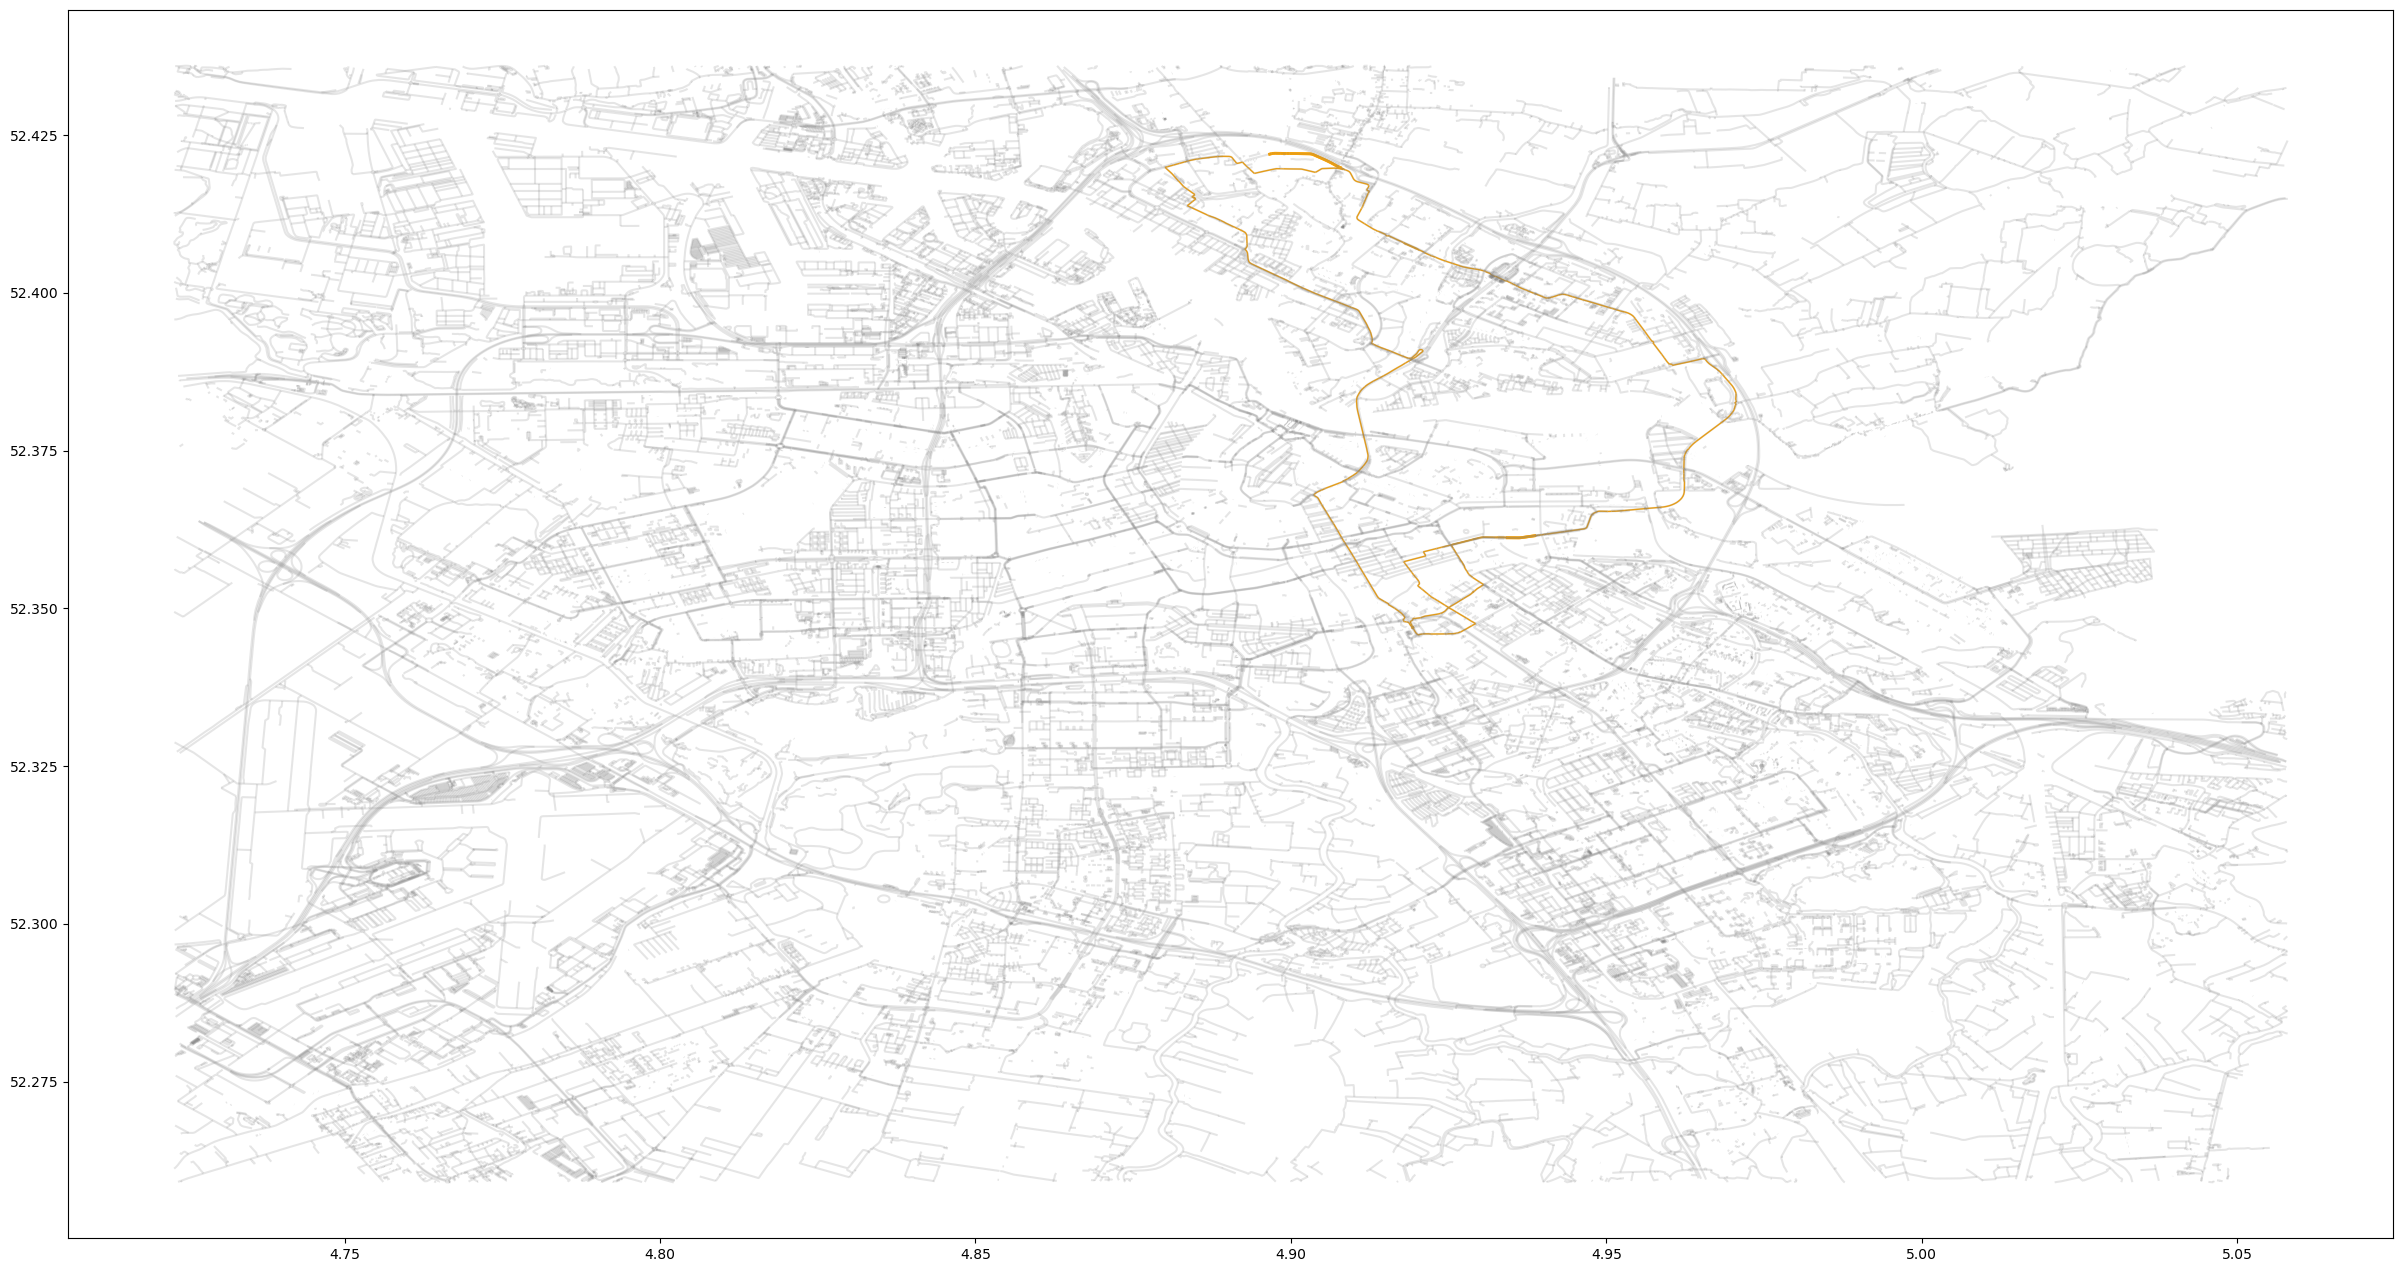

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_bus_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

### Find transfer stations----transfer_station_one_mode

In [189]:
t_station_node = transfer_station_one_mode(city_bus_routes, start_node, end_node, city_bus_new_nodes, city_bus_order_route_dict)

It is impossible to travel from the starting point to the end point by only transferring once through this kind of transportation network.


In [88]:
t_station_node

### Get all stations between s_e nodes and transfer nodes

In [41]:
s_on_route_ref,t_on_route_ref = s_e_on_route_ref(start_node, t_station_node)

In [42]:
s_t_same_routes_df = s_e_same_routes(s_on_route_ref,t_on_route_ref)
s_t_same_routes_df

s_node and e_node are on same route/routes:  ref
0  22



ref
0  22

In [43]:
all_stations_on_matched_routes_dfs_s_t = all_stations_on_matched_routes(s_t_same_routes_df,city_bus_routes,start_node,t_station_node,city_bus_order_route_dict)
all_stations_on_matched_routes_dfs_s_t

[    id                   name                      geometry     geo_x  \
 0   15     Station Sloterdijk  POINT (4.8387698 52.3880096)   4.83877   
 1    3          La Guardiaweg  POINT (4.8403476 52.3915236)  4.840348   
 2   24               Kabelweg  POINT (4.8486876 52.3917417)  4.848688   
 3   14             Contactweg  POINT (4.8567562 52.3920094)  4.856756   
 4   13       Spaarndammerdijk   POINT (4.8620399 52.392447)   4.86204   
 5   39             Zaanstraat    POINT (4.86985 52.3928793)   4.86985   
 6   40     Spaarndammerstraat  POINT (4.8771658 52.3923825)  4.877166   
 7   17       Assendelftstraat  POINT (4.8798373 52.3888866)  4.879837   
 8   19            Nassauplein  POINT (4.8814896 52.3852578)   4.88149   
 9   38        Haarlemmerplein  POINT (4.8836597 52.3851357)   4.88366   
 10  33    Buiten Oranjestraat  POINT (4.8880371 52.3831468)  4.888037   
 11  34  Buiten Brouwersstraat  POINT (4.8915473 52.3815327)  4.891547   
 12  21       Centraal Station  POINT 

In [44]:
btw_stations_each_way_list_s_t = btw_stations_each_way_list(start_node,t_station_node,all_stations_on_matched_routes_dfs_s_t)
btw_stations_each_way_list_s_t

[    id                   name                      geometry     geo_x  \
 13   2      Prins Hendrikkade   POINT (4.9065518 52.373463)  4.906552   
 12  21       Centraal Station  POINT (4.9025698 52.3792093)   4.90257   
 11  34  Buiten Brouwersstraat  POINT (4.8915473 52.3815327)  4.891547   
 10  33    Buiten Oranjestraat  POINT (4.8880371 52.3831468)  4.888037   
 9   38        Haarlemmerplein  POINT (4.8836597 52.3851357)   4.88366   
 8   19            Nassauplein  POINT (4.8814896 52.3852578)   4.88149   
 7   17       Assendelftstraat  POINT (4.8798373 52.3888866)  4.879837   
 6   40     Spaarndammerstraat  POINT (4.8771658 52.3923825)  4.877166   
 5   39             Zaanstraat    POINT (4.86985 52.3928793)   4.86985   
 4   13       Spaarndammerdijk   POINT (4.8620399 52.392447)   4.86204   
 3   14             Contactweg  POINT (4.8567562 52.3920094)  4.856756   
 2   24               Kabelweg  POINT (4.8486876 52.3917417)  4.848688   
 1    3          La Guardiaweg  POINT 

In [45]:
t_on_route_ref,e_on_route_ref = s_e_on_route_ref( t_station_node,end_node)

In [46]:
t_e_same_routes_df = s_e_same_routes(t_on_route_ref,e_on_route_ref)
t_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  15



ref
0  15

In [47]:
all_stations_on_matched_routes_dfs_t_e = all_stations_on_matched_routes(t_e_same_routes_df,city_bus_routes,t_station_node,end_node,city_bus_order_route_dict)
all_stations_on_matched_routes_dfs_t_e

[    id                   name                      geometry     geo_x  \
 0    5     Station Sloterdijk  POINT (4.8388077 52.3877091)  4.838808   
 1   20     Bos en Lommerplein  POINT (4.8464834 52.3772052)  4.846483   
 2   17          Erasmusgracht  POINT (4.8469526 52.3763271)  4.846953   
 3   19    Jan van Galenstraat  POINT (4.8487471 52.3729851)  4.848747   
 4   14          Mercatorplein  POINT (4.8500926 52.3704116)  4.850093   
 5   16      W. Schoutenstraat   POINT (4.8525714 52.366991)  4.852571   
 6   28             Postjesweg  POINT (4.8531765 52.3638554)  4.853177   
 7   30        Corantijnstraat  POINT (4.8532711 52.3615936)  4.853271   
 8    6          Surinameplein  POINT (4.8522845 52.3581748)  4.852284   
 9    3   Haarlemmermeerstraat   POINT (4.8503283 52.355174)  4.850328   
 10   2         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 11  25        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 12  26             Zeilstraat  POINT 

In [48]:
btw_stations_each_way_list_t_e = btw_stations_each_way_list(t_station_node,end_node,all_stations_on_matched_routes_dfs_t_e)
btw_stations_each_way_list_t_e

[    id                   name                      geometry     geo_x  \
 0    5     Station Sloterdijk  POINT (4.8388077 52.3877091)  4.838808   
 1   20     Bos en Lommerplein  POINT (4.8464834 52.3772052)  4.846483   
 2   17          Erasmusgracht  POINT (4.8469526 52.3763271)  4.846953   
 3   19    Jan van Galenstraat  POINT (4.8487471 52.3729851)  4.848747   
 4   14          Mercatorplein  POINT (4.8500926 52.3704116)  4.850093   
 5   16      W. Schoutenstraat   POINT (4.8525714 52.366991)  4.852571   
 6   28             Postjesweg  POINT (4.8531765 52.3638554)  4.853177   
 7   30        Corantijnstraat  POINT (4.8532711 52.3615936)  4.853271   
 8    6          Surinameplein  POINT (4.8522845 52.3581748)  4.852284   
 9    3   Haarlemmermeerstraat   POINT (4.8503283 52.355174)  4.850328   
 10   2         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 11  25        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 12  26             Zeilstraat  POINT 

### Get all nodes and id_pairs of nodes between s_e nodes

In [49]:
btw_all_id_pairs_list_s_t = btw_all_ids_pairs(btw_stations_each_way_list_s_t,city_bus_new_nodes)
btw_all_id_pairs_list_s_t

[     s_id   e_id
 0   68144  67846
 1   67846  67847
 2   67847  19788
 3   19788  67336
 4   67336  67497
 5   67497  67440
 6   67440  67437
 7   67437  68154
 8   68154  68171
 9   68171  67445
 10  67445  67447
 11  67447  28278
 12  28278  67284,
      s_id   e_id
 0   28277  67482
 1   67482  67483
 2   67483  68083
 3   68083  19788
 4   19788  67909
 5   67909  67287
 6   67287  67448
 7   67448  67446
 8   67446  67436
 9   67436  68155
 10  68155  67438
 11  67438  67439
 12  67439  67498
 13  67498  67337]

In [50]:
btw_all_id_pairs_list_t_e = btw_all_ids_pairs(btw_stations_each_way_list_t_e,city_bus_new_nodes)
btw_all_id_pairs_list_t_e

[     s_id   e_id
 0   68268  68266
 1   68266  67396
 2   67396  68235
 3   68235  23651
 4   23651  68238
 5   68238  68237
 6   68237  68230
 7   68230  68234
 8   68234  68282
 9   68282  68285
 10  68285  67578
 11  67578  67474
 12  67474  68326
 13  68326  68195
 14  68195  68203
 15  68203  67475
 16  67475  42437]

### Calculate shortest path and plot

In [51]:
btw_all_id_pairs_list_unique_s_t = drop_df_in_list(btw_all_id_pairs_list_s_t)

At least one dataframe in the list(btw_all_id_pairs_list) is different


In [52]:
btw_all_id_pairs_list_unique_t_e = drop_df_in_list(btw_all_id_pairs_list_t_e)

All dataframes in the list are the same


In [53]:
G = create_ground_graph(edges, nodes)

In [54]:
shortest_path_pairs_way_s_t = all_shortest_paths(G, btw_all_id_pairs_list_unique_s_t[0], edges)

In [55]:
shortest_path_pairs_way_s_t

osm_id                                           geometry  \
37882   445997918  LINESTRING (4.8880371 52.3831468, 4.8878285 52...   
37883   445997918  LINESTRING (4.8878285 52.3832817, 4.8875825 52...   
37884   445997918  LINESTRING (4.8839457 52.3853169, 4.883873 52....   
44695   616339742  LINESTRING (4.8838357 52.3852964, 4.8838086 52...   
44696   616339742  LINESTRING (4.8837135 52.3852027, 4.8836597 52...   
...           ...                                                ...   
47377   678935762  LINESTRING (4.9045326 52.3778212, 4.9039679 52...   
49994   738357506  LINESTRING (4.9034461 52.3787375, 4.9028925 52...   
50964   757674011  LINESTRING (4.9045451 52.3783887, 4.9048507 52...   
57277   866310233  LINESTRING (4.903414 52.3766144, 4.9031423 52....   
63721  1020011232  LINESTRING (4.9034448 52.3751902, 4.9035089 52...   

            service     id  from_id  to_id    distance      time  weights  \
37882        busway  37882    67846  67483   20.661600  0.001653       20   
37883        busway  37883    67483  19166  351.545818  0.028124      351   
37884        busway  37884    19166  28884    7.853400  0.000628        7   
44695        busway  44695    28884  15474   13.508956  0.001081       13   
44696        busway  44696    15474  68144    8.305049  0.000664        8   
...             ...    ...      ...    ...         ...       ...      ...   
47377  construction  47377    28469  37273   88.809630  0.007105       88   
49994        busway  49994    26765  16583   44.088746  0.003527       44   
50964        busway  50964    16999  28468   27.044948  0.002164       27   
57277  construction  57277    18309  18416   38.452090  0.003076       38   
63721     secondary  63721    15544  20028    6.734477  0.000539        6   

              to_from         from_to railway  
37882  (67846, 67483)  (67483, 67846)     bus  
37883  (67483, 19166)  (19166, 67483)     bus  
37884  (19166, 28884)  (28884, 19166)     bus  
44695  (28884, 15474)  (15474, 28884)     bus  
44696  (15474, 68144)  (68144, 15474)     bus  
...               ...             ...     ...  
47377  (28469, 37273)  (37273, 28469)     bus  
49994  (26765, 16583)  (16583, 26765)     bus  
50964  (16999, 28468)  (28468, 16999)     bus  
57277  (18309, 18416)  (18416, 18309)     bus  
63721  (15544, 20028)  (20028, 15544)     bus  

[218 rows x 12 columns]

In [56]:
duplicate_row_count_way_s_t, shortest_path_edges_way_s_t, edges_way_s_t = edges_with_count_weight(shortest_path_pairs_way_s_t, edges)

In [57]:
shortest_path_edges_way_s_t

osm_id                                           geometry  \
0     445997918  LINESTRING (4.8880371 52.3831468, 4.8878285 52...   
1     445997918  LINESTRING (4.8878285 52.3832817, 4.8875825 52...   
2     445997918  LINESTRING (4.8839457 52.3853169, 4.883873 52....   
3     616339742  LINESTRING (4.8838357 52.3852964, 4.8838086 52...   
4     616339742  LINESTRING (4.8837135 52.3852027, 4.8836597 52...   
..          ...                                                ...   
213   678935762  LINESTRING (4.9045326 52.3778212, 4.9039679 52...   
214   738357506  LINESTRING (4.9034461 52.3787375, 4.9028925 52...   
215   757674011  LINESTRING (4.9045451 52.3783887, 4.9048507 52...   
216   866310233  LINESTRING (4.903414 52.3766144, 4.9031423 52....   
217  1020011232  LINESTRING (4.9034448 52.3751902, 4.9035089 52...   

          service     id  from_id  to_id    distance      time  weights  \
0          busway  37882    67846  67483   20.661600  0.001653       20   
1          busway  37883    67483  19166  351.545818  0.028124      351   
2          busway  37884    19166  28884    7.853400  0.000628        7   
3          busway  44695    28884  15474   13.508956  0.001081       13   
4          busway  44696    15474  68144    8.305049  0.000664        8   
..            ...    ...      ...    ...         ...       ...      ...   
213  construction  47377    28469  37273   88.809630  0.007105       88   
214        busway  49994    26765  16583   44.088746  0.003527       44   
215        busway  50964    16999  28468   27.044948  0.002164       27   
216  construction  57277    18309  18416   38.452090  0.003076       38   
217     secondary  63721    15544  20028    6.734477  0.000539        6   

            to_from         from_to railway  count_weight  
0    (67846, 67483)  (67483, 67846)     bus           3.0  
1    (67483, 19166)  (19166, 67483)     bus           3.0  
2    (19166, 28884)  (28884, 19166)     bus           3.0  
3    (28884, 15474)  (15474, 28884)     bus           3.0  
4    (15474, 68144)  (68144, 15474)     bus           3.0  
..              ...             ...     ...           ...  
213  (28469, 37273)  (37273, 28469)     bus           1.0  
214  (26765, 16583)  (16583, 26765)     bus           1.0  
215  (16999, 28468)  (28468, 16999)     bus           1.0  
216  (18309, 18416)  (18416, 18309)     bus           1.0  
217  (15544, 20028)  (20028, 15544)     bus           1.0  

[218 rows x 13 columns]

In [58]:
shortest_path_pairs_way_t_e = all_shortest_paths(G, btw_all_id_pairs_list_unique_t_e[0], edges)

In [59]:
shortest_path_pairs_way_t_e

osm_id                                           geometry  \
50240   740407528  LINESTRING (4.8560722 52.3513667, 4.8561004 52...   
51754   772868271  LINESTRING (4.856506 52.351485, 4.8565125 52.3...   
11834     7381646  LINESTRING (4.8503633 52.3515282, 4.8503718 52...   
11837     7381651  LINESTRING (4.8503877 52.3511819, 4.8503846 52...   
12246     7382916  LINESTRING (4.8503953 52.3517351, 4.8503895 52...   
...           ...                                                ...   
47134   673956735  LINESTRING (4.8702638 52.3406287, 4.8705732 52...   
47135   673956735  LINESTRING (4.8705732 52.340644, 4.8716307 52....   
68490  1115722788  LINESTRING (4.8682675 52.3414389, 4.8683208 52...   
68491  1115722789  LINESTRING (4.8682569 52.3419806, 4.8682786 52...   
68493  1115722790  LINESTRING (4.8682441 52.3421193, 4.8682569 52...   

         service     id  from_id  to_id    distance      time  weights  \
50240   tertiary  50240    68266  16444   32.365885  0.002589       32   
51754  secondary  51754    16444  68268   32.516448  0.002601       32   
11834  secondary  11834    10151  10060   23.308806  0.001865       23   
11837  secondary  11837    10156  10151   38.707189  0.003097       38   
12246  secondary  12246    10060  67396   32.409887  0.002593       32   
...          ...    ...      ...    ...         ...       ...      ...   
47134   tertiary  47134    31002  31003   21.151685  0.001692       21   
47135   tertiary  47135    31003  42437  150.906647  0.012073      150   
68490  secondary  68490    62655  14828   56.754439  0.004540       56   
68491  secondary  68491    62656  62655   60.341851  0.004827       60   
68493  secondary  68493    67475  62656   15.455207  0.001236       15   

              to_from         from_to railway  
50240  (68266, 16444)  (16444, 68266)     bus  
51754  (16444, 68268)  (68268, 16444)     bus  
11834  (10151, 10060)  (10060, 10151)     bus  
11837  (10156, 10151)  (10151, 10156)     bus  
12246  (10060, 67396)  (67396, 10060)     bus  
...               ...             ...     ...  
47134  (31002, 31003)  (31003, 31002)     bus  
47135  (31003, 42437)  (42437, 31003)     bus  
68490  (62655, 14828)  (14828, 62655)     bus  
68491  (62656, 62655)  (62655, 62656)     bus  
68493  (67475, 62656)  (62656, 67475)     bus  

[227 rows x 12 columns]

In [60]:
duplicate_row_count_way_t_e, shortest_path_edges_way_t_e, edges_way_t_e = edges_with_count_weight(shortest_path_pairs_way_t_e, edges)

In [61]:
shortest_path_edges_way_t_e

osm_id                                           geometry    service  \
0     740407528  LINESTRING (4.8560722 52.3513667, 4.8561004 52...   tertiary   
1     772868271  LINESTRING (4.856506 52.351485, 4.8565125 52.3...  secondary   
2       7381646  LINESTRING (4.8503633 52.3515282, 4.8503718 52...  secondary   
3       7381651  LINESTRING (4.8503877 52.3511819, 4.8503846 52...  secondary   
4       7382916  LINESTRING (4.8503953 52.3517351, 4.8503895 52...  secondary   
..          ...                                                ...        ...   
222   673956735  LINESTRING (4.8702638 52.3406287, 4.8705732 52...   tertiary   
223   673956735  LINESTRING (4.8705732 52.340644, 4.8716307 52....   tertiary   
224  1115722788  LINESTRING (4.8682675 52.3414389, 4.8683208 52...  secondary   
225  1115722789  LINESTRING (4.8682569 52.3419806, 4.8682786 52...  secondary   
226  1115722790  LINESTRING (4.8682441 52.3421193, 4.8682569 52...  secondary   

        id  from_id  to_id    distance      time  weights         to_from  \
0    50240    68266  16444   32.365885  0.002589       32  (68266, 16444)   
1    51754    16444  68268   32.516448  0.002601       32  (16444, 68268)   
2    11834    10151  10060   23.308806  0.001865       23  (10151, 10060)   
3    11837    10156  10151   38.707189  0.003097       38  (10156, 10151)   
4    12246    10060  67396   32.409887  0.002593       32  (10060, 67396)   
..     ...      ...    ...         ...       ...      ...             ...   
222  47134    31002  31003   21.151685  0.001692       21  (31002, 31003)   
223  47135    31003  42437  150.906647  0.012073      150  (31003, 42437)   
224  68490    62655  14828   56.754439  0.004540       56  (62655, 14828)   
225  68491    62656  62655   60.341851  0.004827       60  (62656, 62655)   
226  68493    67475  62656   15.455207  0.001236       15  (67475, 62656)   

            from_to railway  count_weight  
0    (16444, 68266)     bus           2.0  
1    (68268, 16444)     bus           2.0  
2    (10060, 10151)     bus           2.0  
3    (10151, 10156)     bus           2.0  
4    (67396, 10060)     bus           2.0  
..              ...     ...           ...  
222  (31003, 31002)     bus           1.0  
223  (42437, 31003)     bus           1.0  
224  (14828, 62655)     bus           1.0  
225  (62655, 62656)     bus           1.0  
226  (62656, 67475)     bus           1.0  

[227 rows x 13 columns]

In [62]:
shortest_path_edges_way = pd.concat([shortest_path_edges_way_s_t,shortest_path_edges_way_t_e])
shortest_path_edges_way

osm_id                                           geometry    service  \
0     445997918  LINESTRING (4.8880371 52.3831468, 4.8878285 52...     busway   
1     445997918  LINESTRING (4.8878285 52.3832817, 4.8875825 52...     busway   
2     445997918  LINESTRING (4.8839457 52.3853169, 4.883873 52....     busway   
3     616339742  LINESTRING (4.8838357 52.3852964, 4.8838086 52...     busway   
4     616339742  LINESTRING (4.8837135 52.3852027, 4.8836597 52...     busway   
..          ...                                                ...        ...   
222   673956735  LINESTRING (4.8702638 52.3406287, 4.8705732 52...   tertiary   
223   673956735  LINESTRING (4.8705732 52.340644, 4.8716307 52....   tertiary   
224  1115722788  LINESTRING (4.8682675 52.3414389, 4.8683208 52...  secondary   
225  1115722789  LINESTRING (4.8682569 52.3419806, 4.8682786 52...  secondary   
226  1115722790  LINESTRING (4.8682441 52.3421193, 4.8682569 52...  secondary   

        id  from_id  to_id    distance      time  weights         to_from  \
0    37882    67846  67483   20.661600  0.001653       20  (67846, 67483)   
1    37883    67483  19166  351.545818  0.028124      351  (67483, 19166)   
2    37884    19166  28884    7.853400  0.000628        7  (19166, 28884)   
3    44695    28884  15474   13.508956  0.001081       13  (28884, 15474)   
4    44696    15474  68144    8.305049  0.000664        8  (15474, 68144)   
..     ...      ...    ...         ...       ...      ...             ...   
222  47134    31002  31003   21.151685  0.001692       21  (31002, 31003)   
223  47135    31003  42437  150.906647  0.012073      150  (31003, 42437)   
224  68490    62655  14828   56.754439  0.004540       56  (62655, 14828)   
225  68491    62656  62655   60.341851  0.004827       60  (62656, 62655)   
226  68493    67475  62656   15.455207  0.001236       15  (67475, 62656)   

            from_to railway  count_weight  
0    (67483, 67846)     bus           3.0  
1    (19166, 67483)     bus           3.0  
2    (28884, 19166)     bus           3.0  
3    (15474, 28884)     bus           3.0  
4    (68144, 15474)     bus           3.0  
..              ...     ...           ...  
222  (31003, 31002)     bus           1.0  
223  (42437, 31003)     bus           1.0  
224  (14828, 62655)     bus           1.0  
225  (62655, 62656)     bus           1.0  
226  (62656, 67475)     bus           1.0  

[445 rows x 13 columns]

<Axes: >

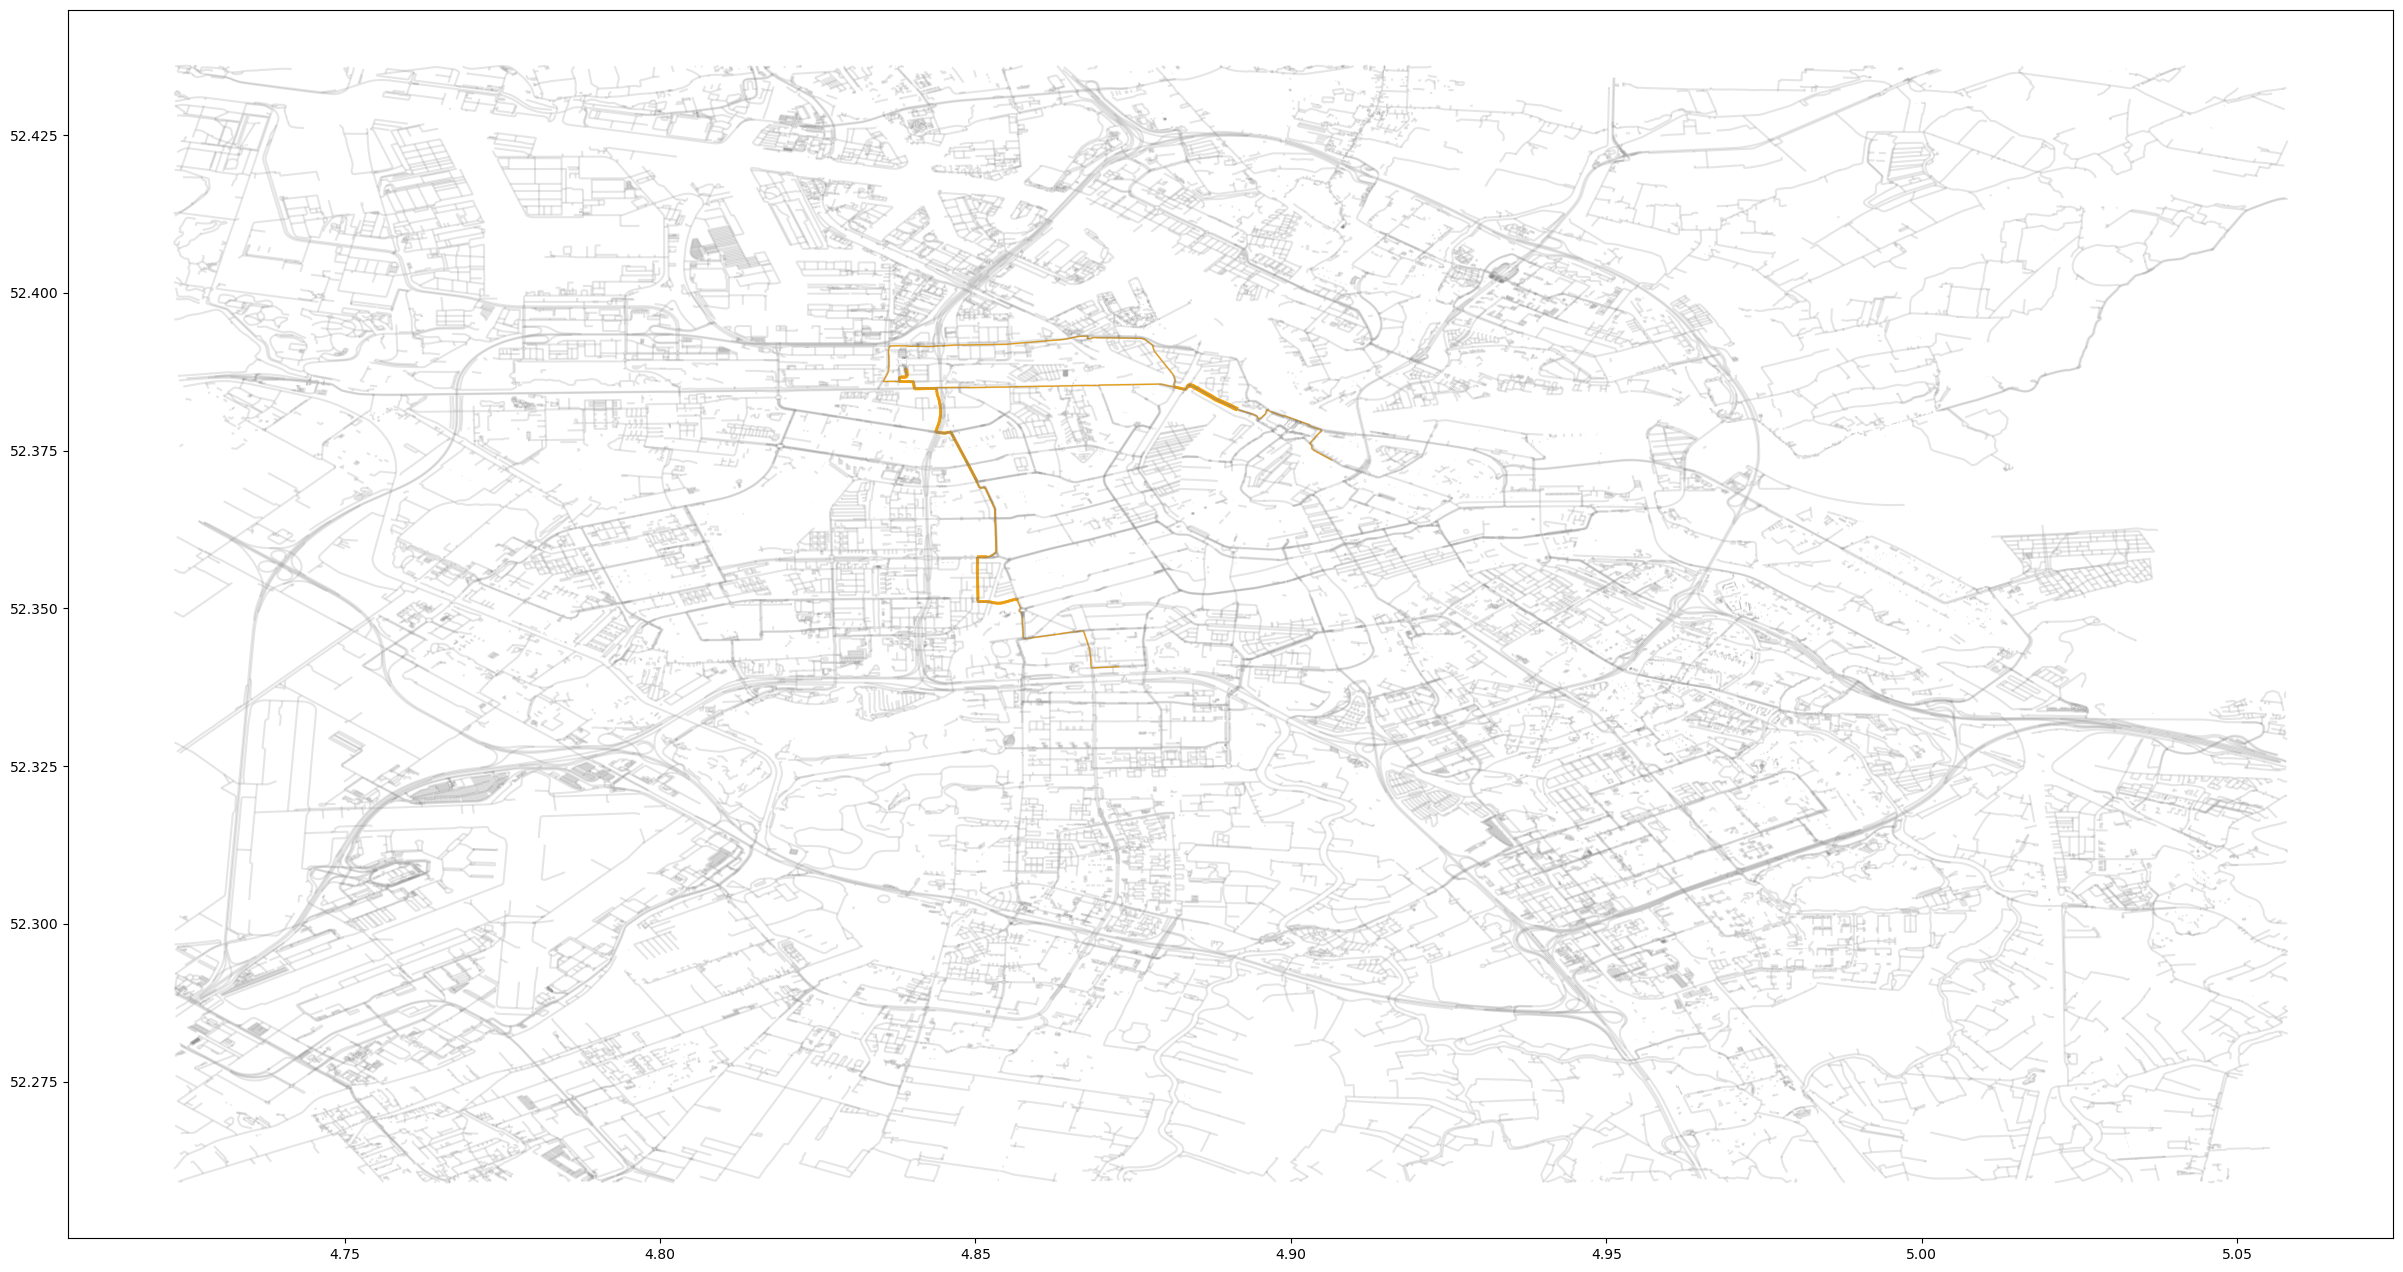

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_bus_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')